In [ ]:
# Tesis

In [ ]:
### Inicialización 

In [ ]:
En base a los datos recolectados a través de la aplicación que se utilizó en el curso “Programación en Python” en el período Marzo 2021-Junio 2021 de la Universidad Nacional de San Martín haremos un análisis con el objetivo de detectar posibles bajas en la materia con anticipación.

El trabajo fue realizado usando Google Analytics como herramienta para medir las interacciones. Algunos alumnos tuvieron que ser eliminados de este análisis porque han bloqueado el seguimiento de esta herramienta en sus navegadores. Por tal motivo, lo recopilado para estos casos no aporta valor pero si ruido.

In [1]:
!pip install pandas
!pip install openpyxl


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import os
from app.models import *
from django.contrib.auth import get_user_model
import matplotlib.pyplot as plt
from datetime import date, timedelta
import seaborn as sns

User = get_user_model()
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

In [ ]:
Se realizó una recopilación de datos acerca del uso del sistema para obtener información sobre el comportamiento de los usuarios. Para esto se utilizó Google Analytics que permitió obtener datos de manera simplificada, desde eventos que accionamos cuando se realizaron ciertas acciones particulares o tiempos de navegación.

La visualización provista por Google Analytics nos permitió por un lado tener un primer análisis sobre los datos recolectados, así como también la exportación de los mismos para un análisis más detallado contrastando contra la base de datos utilizada durante la cursada.

A continuación, inicializaremos las variables para acceder a los datos exportados a excel desde Google Analytics.

In [3]:
# Etiquetas columnas
ids_alumnos = "Etiqueta de evento"
accion_de_eventos = "Acción de evento"
cantidad_eventos = "Total de eventos"
suma_eventos = "Suma de eventos"
duracion_media = "Duración media de la sesión"
indice_dia = "Índice de día"
indice_semana = "Índice de semana"

# Sheets
entregas = pd.read_excel('datos_tesis.xlsx', 'Datos Entregas por fecha por pe')

sesiones = pd.read_excel('datos_tesis.xlsx', 'Datos Sesiones y Uso Usuarios', skiprows=6)
sesiones_semanales = pd.read_excel('datos_tesis.xlsx', 'Datos Sesiones y Uso Usuarios p', skiprows=6)

visitas_paginas = pd.read_excel('datos_tesis.xlsx', 'Datos Visitas por página', skiprows=6)
visitas_paginas_personas = pd.read_excel('datos_tesis.xlsx', 'Datos Visitas por Página por pe', skiprows=6)

eventos = pd.read_excel('datos_tesis.xlsx', 'Datos Eventos por persona por d', skiprows=6)
eventos[indice_dia] = pd.to_datetime(eventos[indice_dia], format='%d%m%Y')
eventos = eventos[(eventos[indice_dia] > "2022-03-08") & (eventos[indice_dia] < "2022-06-23")]
eventos = eventos[(eventos[ids_alumnos] != "(not set)")]
eventos = eventos.sort_values(by=[ids_alumnos])

eventos_totales = pd.read_excel('datos_tesis.xlsx', 'Datos Eventos totales por perso', skiprows=6, nrows=138)
eventos_totales = eventos_totales[(eventos_totales[ids_alumnos] != "(not set)")]
eventos_totales = eventos_totales.sort_values(by=[ids_alumnos])

eventos_semanales = pd.read_excel('datos_tesis.xlsx', 'Datos Eventos por persona por s', skiprows=6, skipfooter=159)
eventos_semanales = eventos_semanales[(eventos_semanales[indice_semana] < 17)]
eventos_semanales = eventos_semanales[(eventos_semanales[ids_alumnos] != "(not set)")]
eventos_semanales = eventos_semanales.sort_values(by=[ids_alumnos])

sesiones = sesiones[(sesiones[ids_alumnos] != "(not set)")]
sesiones = sesiones.sort_values(by=[ids_alumnos])

sesiones_semanales = sesiones_semanales[(sesiones_semanales[ids_alumnos] != "(not set)")]
sesiones_semanales = sesiones_semanales.sort_values(by=[ids_alumnos])

In [ ]:
Una segunda fuente de información es la misma base de datos utilizada en la cursada, donde tenemos registro de los usuarios que utilizaron el sistema, los alumnos, las entregas, las correcciones de los docentes como también las correcciones de los pares y una autoevaluación realizada por los propios alumnos.



In [ ]:
### Segmentación de la población

Comenzaremos segmentando la población de estudiantes 
#### (WIP: justificar por qué segmentamos de esta manera)

In [ ]:
Los alumnos que se inscribieron a la materia no son los mismos que arrancaron la cursada. Empezaremos separando eso.

In [4]:
alumnos_inscriptos = StudentRecord.objects.all()
alumnos_inscriptos.count()

192

In [5]:
alumnos_registrados = alumnos_inscriptos.exclude(user__isnull=True)
alumnos_registrados.count()


165

In [6]:
alumnos_inscriptos_que_no_se_registraron = alumnos_inscriptos.filter(user__isnull=True)
alumnos_inscriptos_que_no_se_registraron.count()

27

In [ ]:
Estos alumnos que se inscribieron a la materia pero nunca la comenzaron forman parte del primer segmento de gente que no arrancaron la cursada 
#### (WIP: Definir el nombre del grupo)

In [ ]:
Sin embargo, existen más usuarios registrados en el sistema que no son alumnos. Los mismos corresponden tanto a Administradores del sistema como a Docentes

In [7]:
usuarios_registrados = User.objects.all()
usuarios_registrados.count()

173

In [8]:
docentes = User.objects.filter(is_staff=True)
docentes.count()

8

In [ ]:
Por lo tanto, si trabajamos con el listado de alumnos registrados, vamos a estar teniendo en cuenta solamente los alumnos que participaron en la cursada.

Hago un renombre para simplificar.

In [9]:
alumnos = alumnos_registrados

In [ ]:
Por otro lado, vamos a considerar como Aprobados a todos los alumnos que están en un listado de IDs. 
El mismo es el listado de aprobados de la materia. Este grupo corresponde a otro segmento 
#### (WIP: Definir el nombre del grupo) 

Dejemos también separados los alumnos que aprobaron de los que desaprobaron la cursada

### Segmento "Aprobados" o Segmento que llegaron hasta el final? Que es lo que más me importa?
#### Al final van a ser los que llegaron al final. El listado de ids aprobados no importa, va a ser los que completaron la unidad 9 como última unidad

Dejamos por aca solamente los datos de los aprobados pero  la plataforma no tiene injerencia sobre la aprobación, pero sí entiende de interacciones y entregas. Así que mejor pararnos ahí.

In [10]:
alumnos_ids_aprobados = [354, 385, 264, 370, 326, 365, 247, 289, 226, 310, 392, 355, 222, 242, 340, 283, 387, 
                         278, 320, 230, 231, 241, 393, 284, 402, 306, 248, 372, 274, 314, 380, 232, 396, 379, 
                         377, 227, 374, 373, 397, 288, 238, 282, 362, 381, 343, 240, 273, 356, 253]

alumnos_aprobados = alumnos.filter(id__in=alumnos_ids_aprobados)

usuarios_ids_aprobados = [alumno.user.id for alumno in alumnos_aprobados]
usuarios_aprobados = usuarios_registrados.filter(id__in=usuarios_ids_aprobados)

len(alumnos_aprobados)

49

In [ ]:
Y también dejemos separados los alumnos que desaprobaron o dejaron la cursada. A partir de estos vamos a poder separar en los dos segmentos que nos faltan: Alumnos que no pasaron la primera parte de la materia y los que pasaron la primera parte de la materia pero no la segunda. 
#### (WIP: nombre del grupo)

In [11]:
alumnos_desaprobados = alumnos.exclude(id__in=alumnos_ids_aprobados)
print(alumnos_desaprobados.count())

116


In [ ]:
Veamos primero los que no pasaron la primera parte de la materia (WIP: nombre del grupo)

Para eso debemos determinar cuando un alumno dejó la materia. 

Vamos a ver a partir de las entregas de cada unidad cuando la gente dejó. Se va a interpretar como dejar en la última unidad entregada. Se pueden llegar a revisar estos casos con posteriores cruces de datos con eventos para tratar de determinar la última interacción con el sistema como día en que se dejó, pero era necesidad de la cursada que para aprobar tenían que entregar todas las unidades.


La unidad 0 se va a usar para interpretar a todos aquellos que no entregaron nunca.

In [12]:
todas_las_entregas = UnitSubmission.objects.all()

entregas_por_persona_y_unidad = {}

for entrega in todas_las_entregas: 
    if entrega.student_record_id in entregas_por_persona_y_unidad.keys():
        if entrega.unit in entregas_por_persona_y_unidad[entrega.student_record_id].keys():
            entregas_por_persona_y_unidad[entrega.student_record_id][entrega.unit].append(entrega)
        else:
            entregas_por_persona_y_unidad[entrega.student_record_id].update({entrega.unit: [entrega]})
    else:
        entregas_por_persona_y_unidad[entrega.student_record_id] = {entrega.unit: [entrega]}
        
entregas_por_persona_y_unidad

{390: {1: [<UnitSubmission: otromailmas@gmail.com: Unidad 1>]},
 388: {1: [<UnitSubmission: unmail@gmail.com: Unidad 1>]},
 387: {1: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 1>],
  2: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 2>,
   <UnitSubmission: juan.manu2699@gmail.com: Unidad 2>],
  3: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 3>],
  4: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 4>],
  5: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 5>],
  6: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 6>],
  7: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 7>],
  8: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 8>],
  9: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 9>]},
 247: {1: [<UnitSubmission: rdledesma1995@gmail.com: Unidad 1>],
  2: [<UnitSubmission: rdledesma1995@gmail.com: Unidad 2>],
  3: [<UnitSubmission: rdledesma1995@gmail.com: Unidad 3>,
   <UnitSubmission: rdledesma1995@gmail.com: Unidad 3>,
   <UnitSubmission: rdledesma1995@g

In [13]:
def unidad_en_la_que_dejo(alumno):
    return max(entregas_por_persona_y_unidad.get(alumno.id, {}).keys(), default=0)
    

In [14]:
cantidad_alumnos_por_unidad_que_dejaron = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
alumnos_por_unidad_que_dejaron = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}

for alumno in alumnos:
    unidad_en_que_se_dejo = unidad_en_la_que_dejo(alumno)
    cantidad_alumnos_por_unidad_que_dejaron[unidad_en_que_se_dejo] += 1
    alumnos_por_unidad_que_dejaron[unidad_en_que_se_dejo].append(alumno)
    
cantidad_alumnos_por_unidad_que_dejaron

{0: 46, 1: 20, 2: 18, 3: 14, 4: 6, 5: 1, 6: 3, 7: 1, 8: 3, 9: 53}

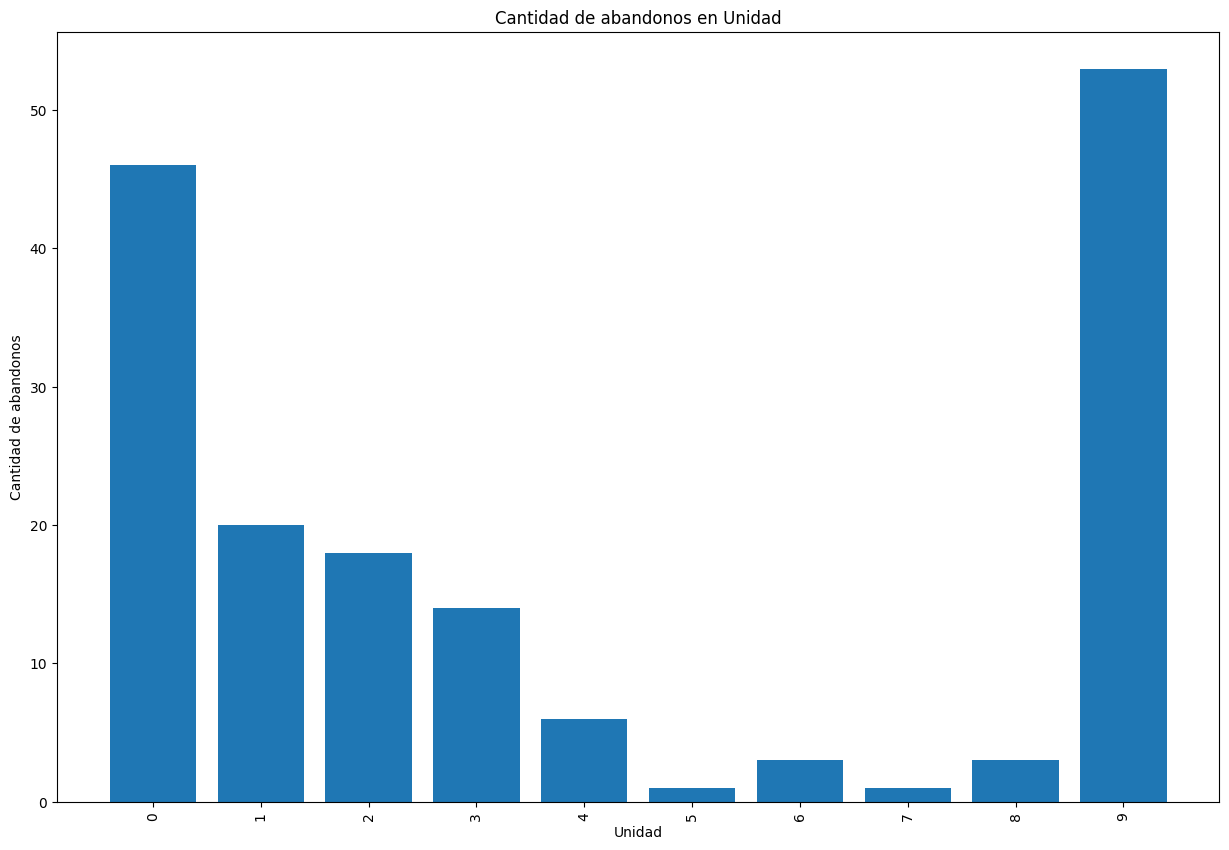

In [15]:
# REFACTORIZAR ESTO. ES EL METODO plot_barras_desde_diccionario CON COLORES
import operator 
x_sorted = sorted(cantidad_alumnos_por_unidad_que_dejaron.items(), key=operator.itemgetter(0))


items_x = [str(unidad) for unidad, cantidad_de_abandonos in x_sorted]
items_y = [cantidad_de_abandonos for unidad, cantidad_de_abandonos in x_sorted]

fig, ax = plt.subplots(figsize=(15, 10))

ax.bar(items_x, items_y)

ax.set_xlabel('Unidad')
ax.set_ylabel('Cantidad de abandonos')
ax.set_title('Cantidad de abandonos en Unidad')
plt.xticks(rotation='vertical')
plt.xticks(items_x)

plt.show()


In [ ]:
El grupo de alumnos que nunca entregó nada, vamos a unirlo al segmento de gente que no se registró nunca en el sistema. Serán todos interpretados como personas que no comenzaron la cursada 

#### WIP tiene sentido poner en la misma bolsa los que no se registraron de los que no entregaron nada? Hay algún evento que nos sirva acá? Era alguien que podriamos haber salvado o no? 
##### Si se inscribieron y no se registraron, no los contamos y los sacamos. 

### Segmento 1: "No entregaron nada"

In [16]:
alumnos_que_no_comenzaron_la_cursada = alumnos_por_unidad_que_dejaron[0]
len(alumnos_que_no_comenzaron_la_cursada)

46

In [ ]:
### Segmento 2: "Dejaron en la primera parte de la materia"

El primer parcial fue después de la unidad 4. Si dejaron de entregar hasta la unidad 4, lo vamos a considerar como que dejaron en la primera parte de la materia. 

In [17]:
alumnos_que_dejaron_en_la_primera_parte_de_la_materia = alumnos_por_unidad_que_dejaron[1] + alumnos_por_unidad_que_dejaron[2] + alumnos_por_unidad_que_dejaron[3] + alumnos_por_unidad_que_dejaron[4]
len(alumnos_que_dejaron_en_la_primera_parte_de_la_materia)

58

In [ ]:
### Segmento 3: "Dejaron en la segunda parte de la materia"
El primer parcial fue después de la unidad 4. Si entregaron unidades posteriores a la unidad 4, lo vamos a considerar como que realizaron toda la primera parte de la materia. Sin embargo, si no entregaron la última unidad (Unidad 9) vamos a considerar que dejaron en la segunda parte de la materia.

In [18]:
alumnos_que_dejaron_en_la_segunda_parte_de_la_materia = alumnos_por_unidad_que_dejaron[5] + alumnos_por_unidad_que_dejaron[6] + alumnos_por_unidad_que_dejaron[7] + alumnos_por_unidad_que_dejaron[8]
len(alumnos_que_dejaron_en_la_segunda_parte_de_la_materia)

8

In [ ]:
### Segmento 4: "Entregaron todo"

In [19]:
alumnos_que_entregaron_todo = alumnos_por_unidad_que_dejaron[9]

len(alumnos_que_entregaron_todo)

53

In [ ]:
Deberiamos validar que las personas que entregaron todas las unidades y no que la última fue la unidad 9

In [20]:
 def entrego_todas_las_unidades(alumno):
    return set(entregas_por_persona_y_unidad.get(alumno.id, {}).keys()) == set({1,2,3,4,5,6,7,8,9})
    
all([entrego_todas_las_unidades(alumno) for alumno in alumnos_que_entregaron_todo])

True

In [ ]:
Entonces el segmento "Entregaron todo" efectivamente, entregó todo.

In [ ]:
## Vamos a armar Dataframes con todos los features que fuimos recolectando

In [21]:
# Dataframe de Ejercicios

l = []

ejercicios = Exercise.objects.all()

for ejercicio in ejercicios:
    unit_submission = ejercicio.unit_submission
    alumno = unit_submission.student_record
    estudios = alumno.studies
    l.append((ejercicio.id, unit_submission.student_record_id, ejercicio.name))

df_exercises = pd.DataFrame(l, columns=['EjercicioID', 'Alumno', 'NombreEjercicio'])
df_exercises

,EjercicioID,Alumno,NombreEjercicio
0,25,390,rebotes.py
1,26,390,hipoteca.py
2,27,390,esfera.py
3,28,390,geringoso.py
4,29,388,rebotes.py
...,...,...,...
3015,3040,226,lote.py
3016,3041,226,torre_control.py
3017,3042,226,canguros_buenos.py
3018,3043,397,mareas_a_mano.py


In [22]:
# Dataframe de UnitSubimissions

l = []

unit_submissions = UnitSubmission.objects.all()

for unit_submission in unit_submissions:
    l.append((unit_submission.id, unit_submission.student_record_id, unit_submission.unit, unit_submission.datetime, unit_submission.accepts_pair_review))

df_unit_submission = pd.DataFrame(l, columns=['UnitSubmissionID', 'Alumno', 'Unidad', 'FechaEntrega', 'AceptaPairReview'])
df_unit_submission

,UnitSubmissionID,Alumno,Unidad,FechaEntrega,AceptaPairReview
0,16,390,1,2022-03-09 16:52:51.340012+00:00,False
1,17,388,1,2022-03-09 17:20:38.676259+00:00,False
2,18,387,1,2022-03-09 22:45:09.486379+00:00,False
3,19,247,1,2022-03-10 12:54:50.324251+00:00,True
4,20,234,1,2022-03-10 20:08:20.512730+00:00,False
...,...,...,...,...,...
909,925,216,6,2022-06-01 17:16:42.812746+00:00,False
910,926,248,9,2022-06-02 07:12:58.163663+00:00,False
911,927,226,9,2022-06-02 21:09:02.528814+00:00,False
912,928,397,8,2022-06-04 15:49:01.419799+00:00,False


In [23]:
# Dataframe de StudentRecord

l = []

student_records = StudentRecord.objects.all()

for student_record in student_records:
    estudios = student_record.studies
    trabajo = student_record.job
    l.append((student_record.id, student_record.gender, student_record.country, student_record.state, student_record.city, estudios.university, estudios.career, estudios.study_level, estudios.programming_skills, estudios.python_skills, estudios.university_location, trabajo.business_name, trabajo.position))

df_student_record = pd.DataFrame(l, columns=['Alumno', 'Genero', 'Pais', 'Estado', 'Ciudad', 'EstudiosUniversidad', 'EstudiosCarrera', 'EstudiosNivel', 'EstudiosNivelProgramacion', 'EstudiosNivelPython', 'EstudiosLocacion', 'TrabajoEmpresa', 'TrabajoRol'])
df_student_record

,Alumno,Genero,Pais,Estado,Ciudad,EstudiosUniversidad,EstudiosCarrera,EstudiosNivel,EstudiosNivelProgramacion,EstudiosNivelPython,EstudiosLocacion,TrabajoEmpresa,TrabajoRol
0,230,3,Argentina,Santa Fe,Rosario,Instituto de Inmunología Clínica y Experimenta...,,Grado (universitario),3.0,3.0,,,
1,226,3,Argentina,Santa Fe,Rosario,IICAR - CONICET/UNR,,Grado (universitario),2.0,2.0,,,
2,215,3,Argentina,Jujuy,Humahuaca,Unju,,Grado (universitario),1.0,1.0,,,
3,220,3,Argentina,CABA,CABA,UNGS,,Maestría,2.0,1.0,,,
4,241,3,Argentina,Buenos Aires,Mar Del Plata,INTEMA,,Grado (universitario),4.0,2.0,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,380,3,Argentina,,,,Licenciatura en Biotecnología,,NaN,NaN,,,
188,399,3,,,,,,,NaN,NaN,,,
189,384,3,,,,,,,NaN,NaN,,,
190,392,3,,,,,,,NaN,NaN,,,


In [24]:
# Dataframe de Correction

l = []

corrections = Correction.objects.all()

for correction in corrections:
    l.append((correction.id, correction.exercise.id, correction.reviewer.email, correction.solves_exercise, correction.code_presentation, correction.works, correction.tests, correction.grade, correction.done, correction.correction_time_in_minutes, correction.published))

df_corrections = pd.DataFrame(l, columns=['CorrectionID', 'EjercicioID', 'Corrector', 'ResuelveEjercicio', 'PresentacionCodigo', 'Funciona', 'Tests', 'Evaluacion', 'Corregido', 'TiempoDeCorreccion', 'Publicado'])
df_corrections

,CorrectionID,EjercicioID,Corrector,ResuelveEjercicio,PresentacionCodigo,Funciona,Tests,Evaluacion,Corregido,TiempoDeCorreccion,Publicado
0,921,936,ivanpedron@gmail.com,1.0,4.0,3.0,1.0,4.0,True,5.0,True
1,1343,1377,dalban@unsam.edu.ar,1.0,1.0,1.0,1.0,1.0,False,0.0,False
2,25,30,matiaslopez@gmail.com,1.0,1.0,1.0,1.0,1.0,False,1.0,False
3,1186,1210,ivanpedron@gmail.com,1.0,5.0,3.0,3.0,5.0,True,6.0,True
4,1178,1202,ivanpedron@gmail.com,1.0,5.0,3.0,3.0,5.0,True,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...
2297,2229,2585,dalban@unsam.edu.ar,1.0,5.0,1.0,3.0,3.0,True,50.0,False
2298,2221,2575,dalban@unsam.edu.ar,1.0,4.0,1.0,3.0,2.0,True,60.0,False
2299,2214,2568,dalban@unsam.edu.ar,1.0,5.0,3.0,3.0,4.0,True,40.0,False
2300,2210,2564,dalban@unsam.edu.ar,1.0,5.0,3.0,3.0,5.0,True,10.0,False


In [25]:
# Dataframe de PairReviewCorrection

l = []

pair_reviews = PairReviewCorrection.objects.all()

for pair_review in pair_reviews:
    l.append((pair_review.id, pair_review.exercise.id, pair_review.reviewer.email, pair_review.correction_datetime, pair_review.is_anonymous_reviewer, pair_review.done, pair_review.published))

df_pair_reviews = pd.DataFrame(l, columns=['PairReviewID', 'EjercicioID', 'Corrector', 'FechaPairReview', 'PaiReviewAnonimo', 'Corregido', 'Publicado'])
df_pair_reviews

,PairReviewID,EjercicioID,Corrector,FechaPairReview,PaiReviewAnonimo,Corregido,Publicado
0,166,2275,clarapalu17@gmail.com,2022-05-11 16:21:38.539829+00:00,True,True,True
1,110,1236,fa_caviglia@hotmail.com,2022-06-01 15:05:55.629501+00:00,True,True,False
2,30,514,clarapalu17@gmail.com,2022-03-30 14:09:02.437626+00:00,True,True,True
3,29,509,mercedesfraire@gmail.com,2022-03-28 21:36:47.188231+00:00,True,True,True
4,44,1045,navarro.gabriel2001@gmail.com,2022-04-06 02:02:58.789904+00:00,True,True,True
...,...,...,...,...,...,...,...
90,141,1958,fedemorales93@gmail.com,2022-06-01 13:55:54.590458+00:00,True,True,False
91,148,2099,hanisch.priscila@gmail.com,2022-05-01 20:56:29.670602+00:00,True,False,False
92,153,1978,hanisch.priscila@gmail.com,2022-05-01 20:57:27.394117+00:00,True,False,False
93,163,2200,ortizrocca@agro.uba.ar,2022-05-07 16:02:58.418603+00:00,True,False,False


In [26]:
# Dataframe de AuthomaticCorrections

l = []

authomatic_corrections = AuthomaticCorrection.objects.all()

for authomatic_correction in authomatic_corrections:
    l.append((authomatic_correction.id, authomatic_correction.exercise.id, authomatic_correction.executed_instruction, authomatic_correction.is_original, authomatic_correction.correct_tests_percentage, authomatic_correction.worked, authomatic_correction.correction_datetime, authomatic_correction.published))

df_authomatic_corrections = pd.DataFrame(l, columns=['AuthomaticCorrectionID', 'EjercicioID', 'InstruccionEjecutada', 'EsOriginal', 'PorcetajeDeTests', 'Funciona', 'FechaDeCorreccionAutomatica', 'Publicado'])
df_authomatic_corrections

,AuthomaticCorrectionID,EjercicioID,InstruccionEjecutada,EsOriginal,PorcetajeDeTests,Funciona,FechaDeCorreccionAutomatica,Publicado
0,685,1050,<p>Para evaluar la función hacer_informe la ll...,True,100.0,True,2022-05-10 15:24:19.795413+00:00,True
1,684,1049,<p>Para evaluar la función costo_camion la lla...,True,0.0,True,2022-05-10 15:24:19.795395+00:00,True
2,683,1038,<p>Para evaluar la función leer_parque la llam...,True,0.0,False,2022-05-10 15:24:19.795376+00:00,True
3,682,1038,<p>Para evaluar la función especies la llamamo...,True,0.0,False,2022-05-10 15:24:19.795358+00:00,True
4,681,1038,<p>Para evaluar la función contar_ejemplares l...,True,0.0,False,2022-05-10 15:24:19.795324+00:00,True
...,...,...,...,...,...,...,...,...
1045,1355,1981,<p>Para evaluar la función parse_csv la llamam...,True,100.0,True,2022-05-26 14:10:48.986887+00:00,True
1046,1352,2123,<p>Para evaluar la función parse_csv la llamam...,True,0.0,True,2022-05-26 14:10:48.986840+00:00,True
1047,1350,2016,<p>Para evaluar la función parse_csv la llamam...,True,100.0,True,2022-05-26 14:10:48.986809+00:00,True
1048,1347,2181,<p>Para evaluar la función parse_csv la llamam...,True,54.0,True,2022-05-26 14:10:48.986761+00:00,True


In [27]:
# Dataframe de SelfEvaluation

l = []

self_evaluations = SelfEvaluation.objects.all()

for self_evaluation in self_evaluations:
    l.append((self_evaluation.id, self_evaluation.unit_submission.student_record.id, self_evaluation.unit_submission.unit, self_evaluation.unit_submission.id, self_evaluation.content_learning, self_evaluation.exercises_autograde, self_evaluation.dedication_in_hours, self_evaluation.dedication_evaluation))

df_self_evaluations = pd.DataFrame(l, columns=['SelfEvaluationID', 'Alumno', 'Unidad', 'UnitSubmissionID', 'AprendizajeDelContenido', 'Autoevaluacion', 'DedicacionEnHoras', 'EvaluacionDedicacion'])
df_self_evaluations

,SelfEvaluationID,Alumno,Unidad,UnitSubmissionID,AprendizajeDelContenido,Autoevaluacion,DedicacionEnHoras,EvaluacionDedicacion
0,9,390,1,16,4,2,10,1
1,10,388,1,17,4,3,14,1
2,11,387,1,18,4,4,8,1
3,12,247,1,19,4,4,8,1
4,13,234,1,20,3,3,5,1
...,...,...,...,...,...,...,...,...
648,657,373,9,921,3,3,8,1
649,658,393,9,922,4,4,10,1
650,659,396,9,923,2,2,24,1
651,660,248,9,924,3,3,12,2


In [28]:
# Dataframe de ExerciseSelfEvaluation

l = []

exercise_self_evaluations = ExerciseSelfEvaluation.objects.all()

for exercise_self_evaluation in exercise_self_evaluations:
    self_evaluation = exercise_self_evaluation.self_evaluation
    l.append((exercise_self_evaluation.id, exercise_self_evaluation.exercise_name, exercise_self_evaluation.grade, self_evaluation.id))

df_exercise_self_evaluations = pd.DataFrame(l, columns=['ExerciseSelfEvaluationID', 'NombreEjercicio', 'EvaluacionEjercicio', 'SelfEvaluationID'])
df_exercise_self_evaluations

,ExerciseSelfEvaluationID,NombreEjercicio,EvaluacionEjercicio,SelfEvaluationID
0,1226,solucion_de_errores.py,6,271
1,1227,costo_camion.py,6,271
2,1228,tabla_informe.py,6,271
3,1229,tablamult.py,6,271
4,1230,arboles.py,5,271
...,...,...,...,...
2960,2996,fileparse.py,6,661
2961,2997,informe_funciones.py,6,661
2962,2998,costo_camion.py,6,661
2963,2999,bbin.py,6,661


In [29]:
# JOIN Unit Submission - StudentRecord - Jobs - Studies

df_unit_submission_en_profundidad = pd.merge(
    df_unit_submission,
    df_student_record,
    how="inner",
    on="Alumno"
)

df_unit_submission_en_profundidad

,UnitSubmissionID,Alumno,Unidad,FechaEntrega,AceptaPairReview,Genero,Pais,Estado,Ciudad,EstudiosUniversidad,EstudiosCarrera,EstudiosNivel,EstudiosNivelProgramacion,EstudiosNivelPython,EstudiosLocacion,TrabajoEmpresa,TrabajoRol
0,16,390,1,2022-03-09 16:52:51.340012+00:00,False,3,ARGENTINA,CABA,Buenos Aires,IFIBYNE,,Doctorado,3.0,2.0,,,
1,17,388,1,2022-03-09 17:20:38.676259+00:00,False,3,Argentina,Buenos Aires,Buenos Aires,Universidad Nacional de Tres de Febrero,Ingenieria en Sonido,Pregrado (tecnicatura),2.0,2.0,,Eryx,Desarrollador
2,18,387,1,2022-03-09 22:45:09.486379+00:00,False,3,,,,,,,NaN,NaN,,,
3,159,387,2,2022-03-21 21:27:22.424808+00:00,False,3,,,,,,,NaN,NaN,,,
4,160,387,2,2022-03-21 21:27:26.749091+00:00,False,3,,,,,,,NaN,NaN,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,799,239,7,2022-05-25 13:38:25.251574+00:00,False,3,Argentina,Córdoba,Alta Gracia,Instituto de Biodiversidad y Biología Experime...,,Grado (universitario),NaN,2.0,,,
910,908,239,8,2022-06-01 15:01:11.871519+00:00,False,3,Argentina,Córdoba,Alta Gracia,Instituto de Biodiversidad y Biología Experime...,,Grado (universitario),NaN,2.0,,,
911,508,214,3,2022-04-13 18:12:34.646782+00:00,False,3,argentina,Córdoba,Córdoba,Universidad Nacional de Córdoba,,Grado (universitario),2.0,1.0,,,
912,509,214,2,2022-04-13 18:56:49.842805+00:00,True,3,argentina,Córdoba,Córdoba,Universidad Nacional de Córdoba,,Grado (universitario),2.0,1.0,,,


In [30]:
# JOIN Exercises - Unit Submission - StudentRecord - Jobs - Studies

df_ejercicios_en_profundidad = pd.merge(
    df_exercises,
    df_unit_submission_en_profundidad,
    how="inner",
    on="Alumno"
)

df_ejercicios_en_profundidad

,EjercicioID,Alumno,NombreEjercicio,UnitSubmissionID,Unidad,FechaEntrega,AceptaPairReview,Genero,Pais,Estado,Ciudad,EstudiosUniversidad,EstudiosCarrera,EstudiosNivel,EstudiosNivelProgramacion,EstudiosNivelPython,EstudiosLocacion,TrabajoEmpresa,TrabajoRol
0,25,390,rebotes.py,16,1,2022-03-09 16:52:51.340012+00:00,False,3,ARGENTINA,CABA,Buenos Aires,IFIBYNE,,Doctorado,3.0,2.0,,,
1,26,390,hipoteca.py,16,1,2022-03-09 16:52:51.340012+00:00,False,3,ARGENTINA,CABA,Buenos Aires,IFIBYNE,,Doctorado,3.0,2.0,,,
2,27,390,esfera.py,16,1,2022-03-09 16:52:51.340012+00:00,False,3,ARGENTINA,CABA,Buenos Aires,IFIBYNE,,Doctorado,3.0,2.0,,,
3,28,390,geringoso.py,16,1,2022-03-09 16:52:51.340012+00:00,False,3,ARGENTINA,CABA,Buenos Aires,IFIBYNE,,Doctorado,3.0,2.0,,,
4,29,388,rebotes.py,17,1,2022-03-09 17:20:38.676259+00:00,False,3,Argentina,Buenos Aires,Buenos Aires,Universidad Nacional de Tres de Febrero,Ingenieria en Sonido,Pregrado (tecnicatura),2.0,2.0,,Eryx,Desarrollador
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35173,1670,214,rebotes.py,509,2,2022-04-13 18:56:49.842805+00:00,True,3,argentina,Córdoba,Córdoba,Universidad Nacional de Córdoba,,Grado (universitario),2.0,1.0,,,
35174,1670,214,rebotes.py,510,1,2022-04-13 19:16:38.117176+00:00,True,3,argentina,Córdoba,Córdoba,Universidad Nacional de Córdoba,,Grado (universitario),2.0,1.0,,,
35175,1671,214,hipoteca.py,508,3,2022-04-13 18:12:34.646782+00:00,False,3,argentina,Córdoba,Córdoba,Universidad Nacional de Córdoba,,Grado (universitario),2.0,1.0,,,
35176,1671,214,hipoteca.py,509,2,2022-04-13 18:56:49.842805+00:00,True,3,argentina,Córdoba,Córdoba,Universidad Nacional de Córdoba,,Grado (universitario),2.0,1.0,,,


In [31]:
# JOIN Correction - Exercises - Unit Submission - StudentRecord - Jobs - Studies

df_correcciones_en_profundidad = pd.merge(
    df_corrections,
    df_ejercicios_en_profundidad,
    how="inner",
    on="EjercicioID"
)

df_correcciones_en_profundidad

,CorrectionID,EjercicioID,Corrector,ResuelveEjercicio,PresentacionCodigo,Funciona,Tests,Evaluacion,Corregido,TiempoDeCorreccion,...,Estado,Ciudad,EstudiosUniversidad,EstudiosCarrera,EstudiosNivel,EstudiosNivelProgramacion,EstudiosNivelPython,EstudiosLocacion,TrabajoEmpresa,TrabajoRol
0,921,936,ivanpedron@gmail.com,1.0,4.0,3.0,1.0,4.0,True,5.0,...,Buenos Aires,General San Martín,UNSAM/CNEA,,Grado (universitario),4.0,4.0,,,
1,921,936,ivanpedron@gmail.com,1.0,4.0,3.0,1.0,4.0,True,5.0,...,Buenos Aires,General San Martín,UNSAM/CNEA,,Grado (universitario),4.0,4.0,,,
2,921,936,ivanpedron@gmail.com,1.0,4.0,3.0,1.0,4.0,True,5.0,...,Buenos Aires,General San Martín,UNSAM/CNEA,,Grado (universitario),4.0,4.0,,,
3,921,936,ivanpedron@gmail.com,1.0,4.0,3.0,1.0,4.0,True,5.0,...,Buenos Aires,General San Martín,UNSAM/CNEA,,Grado (universitario),4.0,4.0,,,
4,921,936,ivanpedron@gmail.com,1.0,4.0,3.0,1.0,4.0,True,5.0,...,Buenos Aires,General San Martín,UNSAM/CNEA,,Grado (universitario),4.0,4.0,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25678,2206,2556,dalban@unsam.edu.ar,1.0,2.0,1.0,3.0,1.0,True,20.0,...,Caba,Caba,UNSAM,Biotecnología,Escuela,2.0,2.0,,,
25679,2206,2556,dalban@unsam.edu.ar,1.0,2.0,1.0,3.0,1.0,True,20.0,...,Caba,Caba,UNSAM,Biotecnología,Escuela,2.0,2.0,,,
25680,2206,2556,dalban@unsam.edu.ar,1.0,2.0,1.0,3.0,1.0,True,20.0,...,Caba,Caba,UNSAM,Biotecnología,Escuela,2.0,2.0,,,
25681,2206,2556,dalban@unsam.edu.ar,1.0,2.0,1.0,3.0,1.0,True,20.0,...,Caba,Caba,UNSAM,Biotecnología,Escuela,2.0,2.0,,,


In [32]:
# JOIN PairReviewCorrection - Exercises - Unit Submission - StudentRecord - Jobs - Studies

df_pair_review_en_profundidad = pd.merge(
    df_pair_reviews,
    df_ejercicios_en_profundidad,
    how="inner",
    on="EjercicioID"
)

df_pair_review_en_profundidad

,PairReviewID,EjercicioID,Corrector,FechaPairReview,PaiReviewAnonimo,Corregido,Publicado,Alumno,NombreEjercicio,UnitSubmissionID,...,Estado,Ciudad,EstudiosUniversidad,EstudiosCarrera,EstudiosNivel,EstudiosNivelProgramacion,EstudiosNivelPython,EstudiosLocacion,TrabajoEmpresa,TrabajoRol
0,166,2275,clarapalu17@gmail.com,2022-05-11 16:21:38.539829+00:00,True,True,True,231,random_walk.py,93,...,Santa Fe,Rosario,CONICET,,Grado (universitario),2.0,2.0,,,
1,166,2275,clarapalu17@gmail.com,2022-05-11 16:21:38.539829+00:00,True,True,True,231,random_walk.py,201,...,Santa Fe,Rosario,CONICET,,Grado (universitario),2.0,2.0,,,
2,166,2275,clarapalu17@gmail.com,2022-05-11 16:21:38.539829+00:00,True,True,True,231,random_walk.py,298,...,Santa Fe,Rosario,CONICET,,Grado (universitario),2.0,2.0,,,
3,166,2275,clarapalu17@gmail.com,2022-05-11 16:21:38.539829+00:00,True,True,True,231,random_walk.py,378,...,Santa Fe,Rosario,CONICET,,Grado (universitario),2.0,2.0,,,
4,166,2275,clarapalu17@gmail.com,2022-05-11 16:21:38.539829+00:00,True,True,True,231,random_walk.py,538,...,Santa Fe,Rosario,CONICET,,Grado (universitario),2.0,2.0,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,141,1958,fedemorales93@gmail.com,2022-06-01 13:55:54.590458+00:00,True,True,False,288,costo_camion.py,587,...,CABA,CABA,MACN-CONICET,,Posdoctorado,3.0,2.0,,,
1106,141,1958,fedemorales93@gmail.com,2022-06-01 13:55:54.590458+00:00,True,True,False,288,costo_camion.py,848,...,CABA,CABA,MACN-CONICET,,Posdoctorado,3.0,2.0,,,
1107,141,1958,fedemorales93@gmail.com,2022-06-01 13:55:54.590458+00:00,True,True,False,288,costo_camion.py,849,...,CABA,CABA,MACN-CONICET,,Posdoctorado,3.0,2.0,,,
1108,141,1958,fedemorales93@gmail.com,2022-06-01 13:55:54.590458+00:00,True,True,False,288,costo_camion.py,850,...,CABA,CABA,MACN-CONICET,,Posdoctorado,3.0,2.0,,,


In [33]:
# JOIN AuthomaticCorrections - Exercises - Unit Submission - StudentRecord - Jobs - Studies

df_authomatic_corrections_en_profundidad = pd.merge(
    df_authomatic_corrections,
    df_ejercicios_en_profundidad,
    how="inner",
    on="EjercicioID"
)

df_authomatic_corrections_en_profundidad

,AuthomaticCorrectionID,EjercicioID,InstruccionEjecutada,EsOriginal,PorcetajeDeTests,Funciona,FechaDeCorreccionAutomatica,Publicado,Alumno,NombreEjercicio,...,Estado,Ciudad,EstudiosUniversidad,EstudiosCarrera,EstudiosNivel,EstudiosNivelProgramacion,EstudiosNivelPython,EstudiosLocacion,TrabajoEmpresa,TrabajoRol
0,685,1050,<p>Para evaluar la función hacer_informe la ll...,True,100.0,True,2022-05-10 15:24:19.795413+00:00,True,384,tabla_informe.py,...,,,,,,NaN,NaN,,,
1,685,1050,<p>Para evaluar la función hacer_informe la ll...,True,100.0,True,2022-05-10 15:24:19.795413+00:00,True,384,tabla_informe.py,...,,,,,,NaN,NaN,,,
2,685,1050,<p>Para evaluar la función hacer_informe la ll...,True,100.0,True,2022-05-10 15:24:19.795413+00:00,True,384,tabla_informe.py,...,,,,,,NaN,NaN,,,
3,685,1050,<p>Para evaluar la función hacer_informe la ll...,True,100.0,True,2022-05-10 15:24:19.795413+00:00,True,384,tabla_informe.py,...,,,,,,NaN,NaN,,,
4,685,1050,<p>Para evaluar la función hacer_informe la ll...,True,100.0,True,2022-05-10 15:24:19.795413+00:00,True,384,tabla_informe.py,...,,,,,,NaN,NaN,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1345,1998,<p>Para evaluar la función parse_csv la llamam...,True,100.0,True,2022-05-26 14:10:48.986716+00:00,True,384,fileparse.py,...,,,,,,NaN,NaN,,,
13124,1345,1998,<p>Para evaluar la función parse_csv la llamam...,True,100.0,True,2022-05-26 14:10:48.986716+00:00,True,384,fileparse.py,...,,,,,,NaN,NaN,,,
13125,1345,1998,<p>Para evaluar la función parse_csv la llamam...,True,100.0,True,2022-05-26 14:10:48.986716+00:00,True,384,fileparse.py,...,,,,,,NaN,NaN,,,
13126,1345,1998,<p>Para evaluar la función parse_csv la llamam...,True,100.0,True,2022-05-26 14:10:48.986716+00:00,True,384,fileparse.py,...,,,,,,NaN,NaN,,,


In [34]:
# JOIN SelfEvaluation - Unit Submission - StudentRecord - Jobs - Studies

df_self_evaluation_en_profundidad = pd.merge(
    df_self_evaluations,
    df_unit_submission_en_profundidad,
    how="inner",
    on="UnitSubmissionID"
)

df_self_evaluation_en_profundidad

,SelfEvaluationID,Alumno_x,Unidad_x,UnitSubmissionID,AprendizajeDelContenido,Autoevaluacion,DedicacionEnHoras,EvaluacionDedicacion,Alumno_y,Unidad_y,...,Estado,Ciudad,EstudiosUniversidad,EstudiosCarrera,EstudiosNivel,EstudiosNivelProgramacion,EstudiosNivelPython,EstudiosLocacion,TrabajoEmpresa,TrabajoRol
0,9,390,1,16,4,2,10,1,390,1,...,CABA,Buenos Aires,IFIBYNE,,Doctorado,3.0,2.0,,,
1,10,388,1,17,4,3,14,1,388,1,...,Buenos Aires,Buenos Aires,Universidad Nacional de Tres de Febrero,Ingenieria en Sonido,Pregrado (tecnicatura),2.0,2.0,,Eryx,Desarrollador
2,11,387,1,18,4,4,8,1,387,1,...,,,,,,NaN,NaN,,,
3,12,247,1,19,4,4,8,1,247,1,...,Salta,Salta,INENCO - Universidad Nacional de Salta,,Grado (universitario),5.0,3.0,,,
4,13,234,1,20,3,3,5,1,234,1,...,Corrientes,Corrientes Capital,Becario Doctoral de CONICET - INTA Concordia (...,,Grado (universitario),2.0,2.0,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,657,373,9,921,3,3,8,1,373,9,...,,,,Ingeniería Biomedica,,NaN,NaN,,,
649,658,393,9,922,4,4,10,1,393,9,...,,,,,,NaN,NaN,,,
650,659,396,9,923,2,2,24,1,396,9,...,,,,,,NaN,NaN,,,
651,660,248,9,924,3,3,12,2,248,9,...,Buenos Aires,San Martín,Universidad de Buenos Aires,,Grado (universitario),2.0,2.0,,,


In [35]:
# JOIN ExerciseSelfEvaluation - SelfEvaluation - Unit Submission - StudentRecord - Jobs - Studies

df_exercise_self_evaluation_en_profundidad = pd.merge(
    df_exercise_self_evaluations,
    df_self_evaluation_en_profundidad,
    how="inner",
    on="SelfEvaluationID"
)

df_exercise_self_evaluation_en_profundidad

,ExerciseSelfEvaluationID,NombreEjercicio,EvaluacionEjercicio,SelfEvaluationID,Alumno_x,Unidad_x,UnitSubmissionID,AprendizajeDelContenido,Autoevaluacion,DedicacionEnHoras,...,Estado,Ciudad,EstudiosUniversidad,EstudiosCarrera,EstudiosNivel,EstudiosNivelProgramacion,EstudiosNivelPython,EstudiosLocacion,TrabajoEmpresa,TrabajoRol
0,1226,solucion_de_errores.py,6,271,356,3,306,3,3,13,...,Buenos Aires,San Martín,UNSAM,Ingeniería Electrónica,Escuela,3.0,2.0,,,
1,1227,costo_camion.py,6,271,356,3,306,3,3,13,...,Buenos Aires,San Martín,UNSAM,Ingeniería Electrónica,Escuela,3.0,2.0,,,
2,1228,tabla_informe.py,6,271,356,3,306,3,3,13,...,Buenos Aires,San Martín,UNSAM,Ingeniería Electrónica,Escuela,3.0,2.0,,,
3,1229,tablamult.py,6,271,356,3,306,3,3,13,...,Buenos Aires,San Martín,UNSAM,Ingeniería Electrónica,Escuela,3.0,2.0,,,
4,1230,arboles.py,5,271,356,3,306,3,3,13,...,Buenos Aires,San Martín,UNSAM,Ingeniería Electrónica,Escuela,3.0,2.0,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,2996,fileparse.py,6,661,216,6,925,2,3,20,...,Corrientes,Corrientes,Centro de Ecología Aplicada del Litoral (Conse...,,Grado (universitario),4.0,2.0,,,
2961,2997,informe_funciones.py,6,661,216,6,925,2,3,20,...,Corrientes,Corrientes,Centro de Ecología Aplicada del Litoral (Conse...,,Grado (universitario),4.0,2.0,,,
2962,2998,costo_camion.py,6,661,216,6,925,2,3,20,...,Corrientes,Corrientes,Centro de Ecología Aplicada del Litoral (Conse...,,Grado (universitario),4.0,2.0,,,
2963,2999,bbin.py,6,661,216,6,925,2,3,20,...,Corrientes,Corrientes,Centro de Ecología Aplicada del Litoral (Conse...,,Grado (universitario),4.0,2.0,,,


In [36]:
from pathlib import Path  
filepath = Path('exercises_unit_submission_student_record.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_ejercicios_en_profundidad.to_csv(filepath)  

filepath = Path('corrections_exercises_unit_submission_student_record.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_correcciones_en_profundidad.to_csv(filepath) 

filepath = Path('pair_review_exercises_unit_submission_student_record.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_pair_review_en_profundidad.to_csv(filepath) 

filepath = Path('authomatic_corrections_exercises_unit_submission_student_record.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_authomatic_corrections_en_profundidad.to_csv(filepath) 

filepath = Path('exercise_self_evaluation_self_evaluation_unit_submission_student_record.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_exercise_self_evaluation_en_profundidad.to_csv(filepath) 

In [ ]:
## Entregas por unidad

/tmp/ipykernel_636396/3020020738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_unidades.index, y=frecuencia_unidades.values, palette='muted')


<Axes: xlabel='None'>

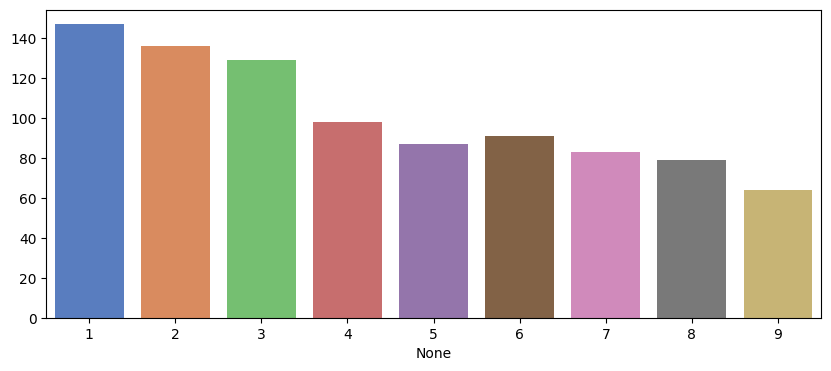

In [37]:
plt.subplots(figsize=(10,4))

frecuencia_unidades = df_unit_submission_en_profundidad['Unidad'].value_counts()
sns.barplot(x=frecuencia_unidades.index, y=frecuencia_unidades.values, palette='muted')

In [ ]:
Vamos a graficar lo mismo para cada uno de nuestros segmentos

In [ ]:
### Entregas por unidad por grupo


In [38]:
# Segmento 1
import numpy

segmento_1_ids = [alumno.id for alumno in alumnos_que_no_comenzaron_la_cursada]

filtered_df = df_unit_submission_en_profundidad[df_unit_submission_en_profundidad['Alumno'].isin(segmento_1_ids)]

print(filtered_df)

Empty DataFrame
Columns: [UnitSubmissionID, Alumno, Unidad, FechaEntrega, AceptaPairReview, Genero, Pais, Estado, Ciudad, EstudiosUniversidad, EstudiosCarrera, EstudiosNivel, EstudiosNivelProgramacion, EstudiosNivelPython, EstudiosLocacion, TrabajoEmpresa, TrabajoRol]
Index: []


In [ ]:
Para el Segmento 1 tiene sentido porque es el segmento que no entregó nada. 

/tmp/ipykernel_636396/3124369917.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_unidades_segmento_2.index, y=frecuencia_unidades_segmento_2.values, palette='muted')


<Axes: xlabel='None'>

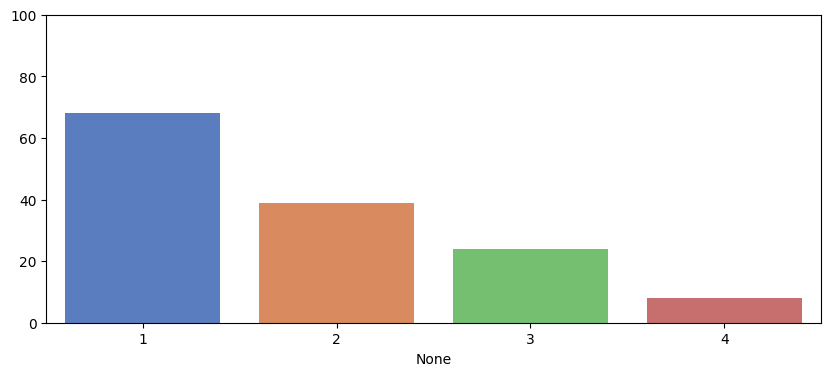

In [39]:
# Segmento 2
import numpy

plt.subplots(figsize=(10,4))
plt.ylim(0,100)

segmento_2_ids = [alumno.id for alumno in alumnos_que_dejaron_en_la_primera_parte_de_la_materia]

filtered_df = df_unit_submission_en_profundidad[df_unit_submission_en_profundidad['Alumno'].isin(segmento_2_ids)]

frecuencia_unidades_segmento_2 = filtered_df['Unidad'].value_counts()
sns.barplot(x=frecuencia_unidades_segmento_2.index, y=frecuencia_unidades_segmento_2.values, palette='muted')

/tmp/ipykernel_636396/3375176005.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_unidades_segmento_3.index, y=frecuencia_unidades_segmento_3.values, palette='muted')


<Axes: xlabel='None'>

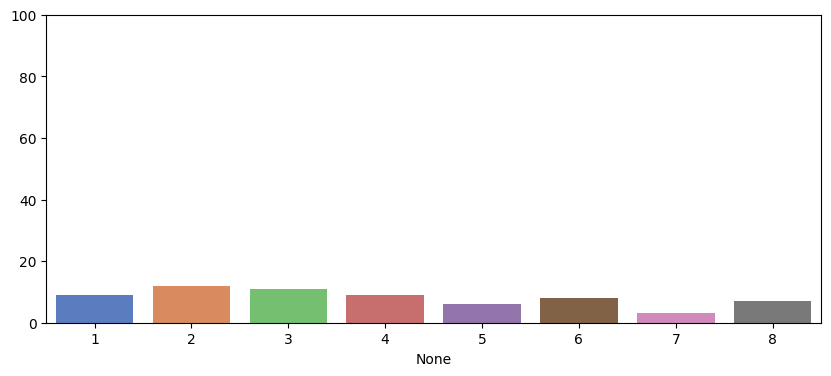

In [40]:
# Segmento 3
import numpy

plt.subplots(figsize=(10,4))
plt.ylim(0,100)

segmento_3_ids = [alumno.id for alumno in alumnos_que_dejaron_en_la_segunda_parte_de_la_materia]

filtered_df = df_unit_submission_en_profundidad[df_unit_submission_en_profundidad['Alumno'].isin(segmento_3_ids)]

frecuencia_unidades_segmento_3 = filtered_df['Unidad'].value_counts()
sns.barplot(x=frecuencia_unidades_segmento_3.index, y=frecuencia_unidades_segmento_3.values, palette='muted')

/tmp/ipykernel_636396/439993699.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_unidades_segmento_4.index, y=frecuencia_unidades_segmento_4.values, palette='muted')


<Axes: xlabel='None'>

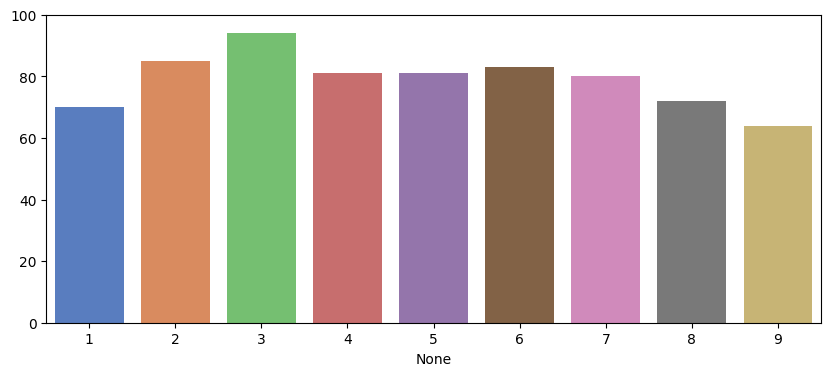

In [41]:
# Segmento 4
import numpy

plt.subplots(figsize=(10,4))
plt.ylim(0,100)

segmento_4_ids = [alumno.id for alumno in alumnos_que_entregaron_todo]

filtered_df = df_unit_submission_en_profundidad[df_unit_submission_en_profundidad['Alumno'].isin(segmento_4_ids)]

frecuencia_unidades_segmento_4 = filtered_df['Unidad'].value_counts()

sns.barplot(x=frecuencia_unidades_segmento_4.index, y=frecuencia_unidades_segmento_4.values, palette='muted')


In [ ]:
### Quiero ver en que Unidad dejaron dependiendo de la segmentación

Vamos a probar ver a partir de las entregas cuando la gente dejó. Se va a interpretar como dejar en la última unidad entregada. Se pueden llegar a revisar estos casos con posteriores cruces de datos con eventos para tratar de determinar la última interacción con el sistema como día en que se dejó.

La unidad 0 se va a usar para interpretar a todos aquellos que no entregaron nunca.

In [42]:
todas_las_entregas = UnitSubmission.objects.all()

entregas_por_persona_y_unidad = {}

for entrega in todas_las_entregas: 
    if entrega.student_record_id in entregas_por_persona_y_unidad.keys():
        if entrega.unit in entregas_por_persona_y_unidad[entrega.student_record_id].keys():
            entregas_por_persona_y_unidad[entrega.student_record_id][entrega.unit].append(entrega)
        else:
            entregas_por_persona_y_unidad[entrega.student_record_id].update({entrega.unit: [entrega]})
    else:
        entregas_por_persona_y_unidad[entrega.student_record_id] = {entrega.unit: [entrega]}
        
entregas_por_persona_y_unidad

{390: {1: [<UnitSubmission: otromailmas@gmail.com: Unidad 1>]},
 388: {1: [<UnitSubmission: unmail@gmail.com: Unidad 1>]},
 387: {1: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 1>],
  2: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 2>,
   <UnitSubmission: juan.manu2699@gmail.com: Unidad 2>],
  3: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 3>],
  4: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 4>],
  5: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 5>],
  6: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 6>],
  7: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 7>],
  8: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 8>],
  9: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 9>]},
 247: {1: [<UnitSubmission: rdledesma1995@gmail.com: Unidad 1>],
  2: [<UnitSubmission: rdledesma1995@gmail.com: Unidad 2>],
  3: [<UnitSubmission: rdledesma1995@gmail.com: Unidad 3>,
   <UnitSubmission: rdledesma1995@gmail.com: Unidad 3>,
   <UnitSubmission: rdledesma1995@g

In [43]:
entregas_por_persona_y_unidad

{390: {1: [<UnitSubmission: otromailmas@gmail.com: Unidad 1>]},
 388: {1: [<UnitSubmission: unmail@gmail.com: Unidad 1>]},
 387: {1: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 1>],
  2: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 2>,
   <UnitSubmission: juan.manu2699@gmail.com: Unidad 2>],
  3: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 3>],
  4: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 4>],
  5: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 5>],
  6: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 6>],
  7: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 7>],
  8: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 8>],
  9: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 9>]},
 247: {1: [<UnitSubmission: rdledesma1995@gmail.com: Unidad 1>],
  2: [<UnitSubmission: rdledesma1995@gmail.com: Unidad 2>],
  3: [<UnitSubmission: rdledesma1995@gmail.com: Unidad 3>,
   <UnitSubmission: rdledesma1995@gmail.com: Unidad 3>,
   <UnitSubmission: rdledesma1995@g

In [44]:
def unidad_en_la_que_dejo(alumno):
    return max(entregas_por_persona_y_unidad.get(alumno.id, {}).keys(), default=0)
    

In [45]:
alumnos_por_unidad_que_dejaron = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for alumno in alumnos:
    unidad_en_que_se_dejo = unidad_en_la_que_dejo(alumno)
    alumnos_por_unidad_que_dejaron[unidad_en_que_se_dejo] += 1
    
alumnos_por_unidad_que_dejaron

{0: 46, 1: 20, 2: 18, 3: 14, 4: 6, 5: 1, 6: 3, 7: 1, 8: 3, 9: 53}

In [46]:
alumnos_por_unidad_que_dejaron_segmento_2 = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for alumno in alumnos:
    if alumno in alumnos_que_dejaron_en_la_primera_parte_de_la_materia: 
        unidad_en_que_se_dejo = unidad_en_la_que_dejo(alumno)
        alumnos_por_unidad_que_dejaron_segmento_2[unidad_en_que_se_dejo] += 1
    
alumnos_por_unidad_que_dejaron_segmento_2

{0: 0, 1: 20, 2: 18, 3: 14, 4: 6, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

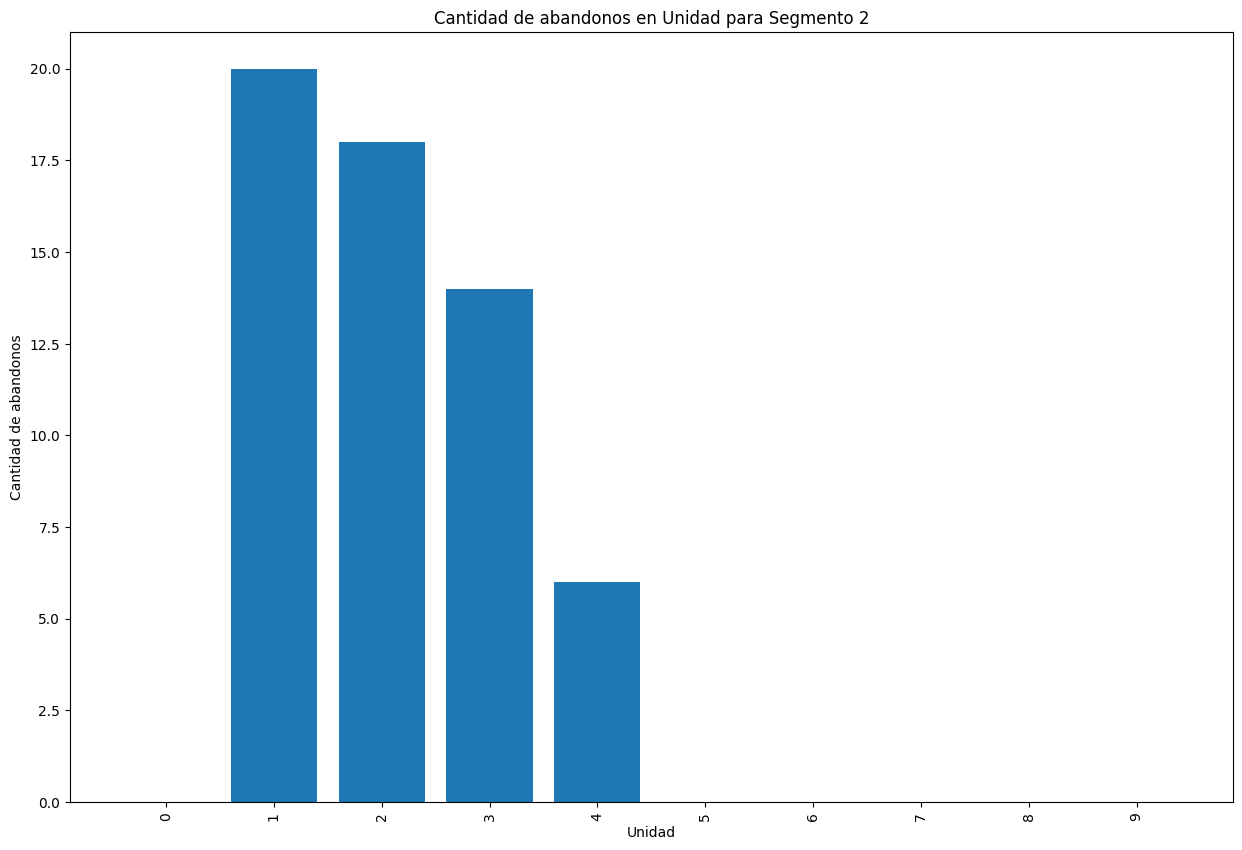

In [47]:
# REFACTORIZAR ESTO. ES EL METODO plot_barras_desde_diccionario CON COLORES
import operator 
x_sorted = sorted(alumnos_por_unidad_que_dejaron_segmento_2.items(), key=operator.itemgetter(0))


items_x = [str(unidad) for unidad, cantidad_de_abandonos in x_sorted]
items_y = [cantidad_de_abandonos for unidad, cantidad_de_abandonos in x_sorted]

fig, ax = plt.subplots(figsize=(15, 10))

ax.bar(items_x, items_y)

ax.set_xlabel('Unidad')
ax.set_ylabel('Cantidad de abandonos')
ax.set_title('Cantidad de abandonos en Unidad para Segmento 2')
plt.xticks(rotation='vertical')
plt.xticks(items_x)

plt.show()


In [48]:
alumnos_por_unidad_que_dejaron_segmento_3 = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for alumno in alumnos:
    if alumno in alumnos_que_dejaron_en_la_segunda_parte_de_la_materia: 
        unidad_en_que_se_dejo = unidad_en_la_que_dejo(alumno)
        alumnos_por_unidad_que_dejaron_segmento_3[unidad_en_que_se_dejo] += 1
    
alumnos_por_unidad_que_dejaron_segmento_3

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 3, 7: 1, 8: 3, 9: 0}

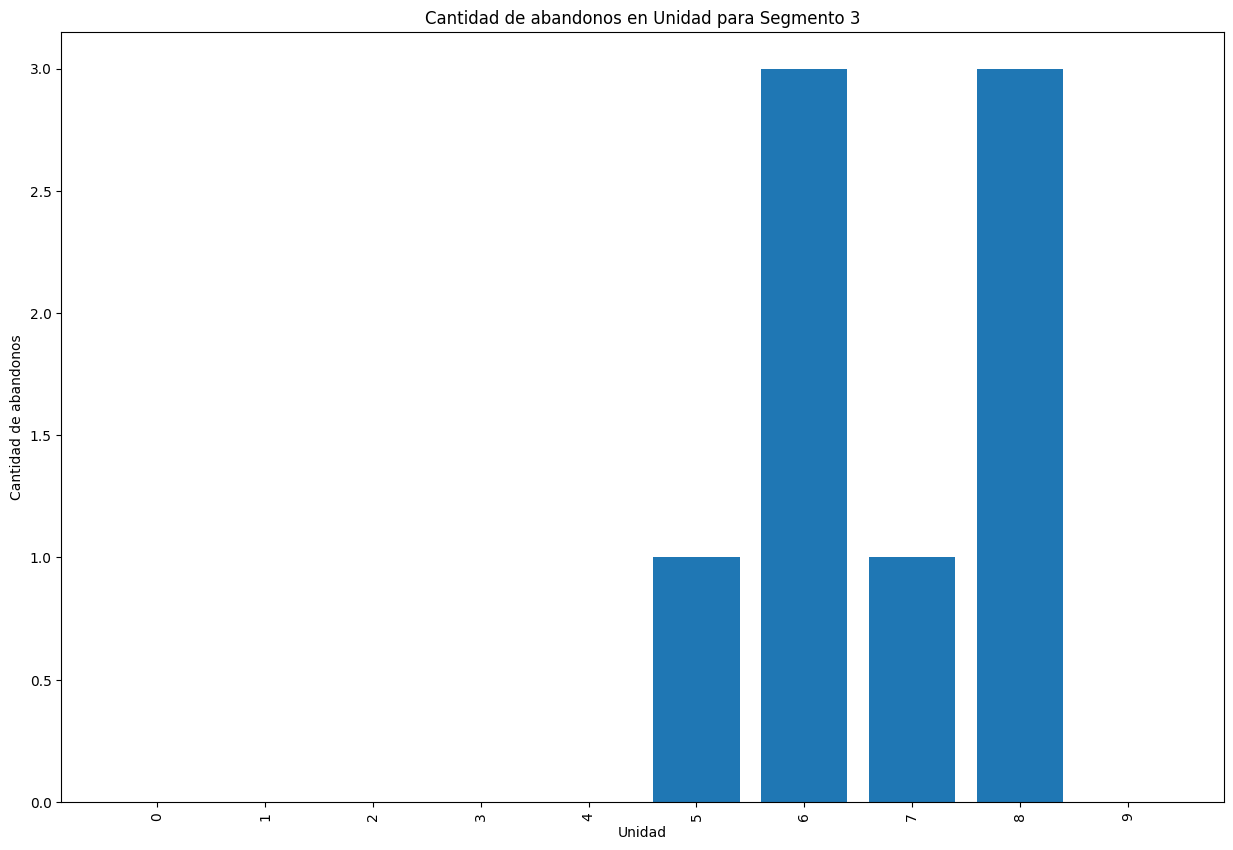

In [49]:
# REFACTORIZAR ESTO. ES EL METODO plot_barras_desde_diccionario CON COLORES
import operator 
x_sorted = sorted(alumnos_por_unidad_que_dejaron_segmento_3.items(), key=operator.itemgetter(0))


items_x = [str(unidad) for unidad, cantidad_de_abandonos in x_sorted]
items_y = [cantidad_de_abandonos for unidad, cantidad_de_abandonos in x_sorted]

fig, ax = plt.subplots(figsize=(15, 10))

ax.bar(items_x, items_y)

ax.set_xlabel('Unidad')
ax.set_ylabel('Cantidad de abandonos')
ax.set_title('Cantidad de abandonos en Unidad para Segmento 3')
plt.xticks(rotation='vertical')
plt.xticks(items_x)

plt.show()


In [ ]:
## Reentregas por unidad

In [ ]:
Hagamos el mismo análisis pero no tomemos todas las entregas. Tomemos solamente la última entrega de cada unidad, para interpretar "hasta este momento estuve con la unidad".

In [50]:
### ESTO PUEDE LLEGAR A NECESITAR SUBIRSE Y USARSE EN OTROS LUGARES

todas_las_entregas = UnitSubmission.objects.all()

entregas_por_persona_y_unidad = {}

for entrega in todas_las_entregas: 
    if entrega.student_record_id in entregas_por_persona_y_unidad.keys():
        if entrega.unit in entregas_por_persona_y_unidad[entrega.student_record_id].keys():
            entregas_por_persona_y_unidad[entrega.student_record_id][entrega.unit].append(entrega)
        else:
            entregas_por_persona_y_unidad[entrega.student_record_id].update({entrega.unit: [entrega]})
    else:
        entregas_por_persona_y_unidad[entrega.student_record_id] = {entrega.unit: [entrega]}
        
entregas_por_persona_y_unidad

{390: {1: [<UnitSubmission: otromailmas@gmail.com: Unidad 1>]},
 388: {1: [<UnitSubmission: unmail@gmail.com: Unidad 1>]},
 387: {1: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 1>],
  2: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 2>,
   <UnitSubmission: juan.manu2699@gmail.com: Unidad 2>],
  3: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 3>],
  4: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 4>],
  5: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 5>],
  6: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 6>],
  7: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 7>],
  8: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 8>],
  9: [<UnitSubmission: juan.manu2699@gmail.com: Unidad 9>]},
 247: {1: [<UnitSubmission: rdledesma1995@gmail.com: Unidad 1>],
  2: [<UnitSubmission: rdledesma1995@gmail.com: Unidad 2>],
  3: [<UnitSubmission: rdledesma1995@gmail.com: Unidad 3>,
   <UnitSubmission: rdledesma1995@gmail.com: Unidad 3>,
   <UnitSubmission: rdledesma1995@g

In [51]:
cantidad_de_reentregas_por_persona_por_unidad = {}

for persona, entregas_por_unidad in entregas_por_persona_y_unidad.items():
    cantidad_de_reentregas_por_persona_por_unidad.update({persona: {}})
    for unidad, entregas in entregas_por_unidad.items():
        if len(entregas) > 1:
            cantidad_de_reentregas_por_persona_por_unidad[persona][unidad] = len(entregas) - 1
        else:
            cantidad_de_reentregas_por_persona_por_unidad[persona][unidad] = 0
    
cantidad_de_reentregas_por_persona_por_unidad

{390: {1: 0},
 388: {1: 0},
 387: {1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 247: {1: 0, 2: 0, 3: 2, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 234: {1: 0, 2: 0, 3: 0},
 268: {1: 0, 2: 0, 3: 0},
 380: {1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 7: 1, 8: 0, 9: 0, 6: 0},
 368: {1: 0, 2: 0, 3: 1, 4: 2, 5: 0, 6: 0},
 340: {1: 0, 2: 0, 3: 1, 4: 1, 5: 2, 6: 0, 7: 0, 8: 0, 9: 1},
 343: {1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0},
 218: {1: 0, 2: 0, 3: 0},
 283: {1: 0, 2: 1, 3: 0, 4: 1, 5: 1, 6: 2, 7: 0, 8: 1, 9: 1},
 227: {1: 0, 2: 1, 3: 1, 4: 2, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0},
 353: {1: 0, 2: 0, 3: 0},
 339: {1: 1, 2: 1, 3: 2, 4: 1},
 292: {1: 0, 2: 0, 3: 0},
 393: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 1, 9: 0},
 355: {1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 0, 7: 1, 8: 1, 9: 0},
 230: {1: 0, 2: 0, 3: 0, 4: 1, 6: 0, 8: 0, 9: 0, 5: 0, 7: 0},
 248: {1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 1},
 287: {1: 0, 2: 0, 3: 0, 4: 0},
 264: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 8: 1, 7: 

In [ ]:
### Conviene hacer con el promedio aca? 

In [52]:
# Segmento 2
reentregas_por_unidad_que_dejaron_segmento_2 = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for alumno, reentregas_por_unidad in cantidad_de_reentregas_por_persona_por_unidad.items():
    if alumno in [alumn.id for alumn in alumnos_que_dejaron_en_la_primera_parte_de_la_materia]: 
        for unidad in range(0,10):
            reentregas_por_unidad_que_dejaron_segmento_2[unidad] += reentregas_por_unidad.get(unidad, 0)
        
    
reentregas_por_unidad_que_dejaron_segmento_2

{0: 0, 1: 13, 2: 4, 3: 4, 4: 2, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

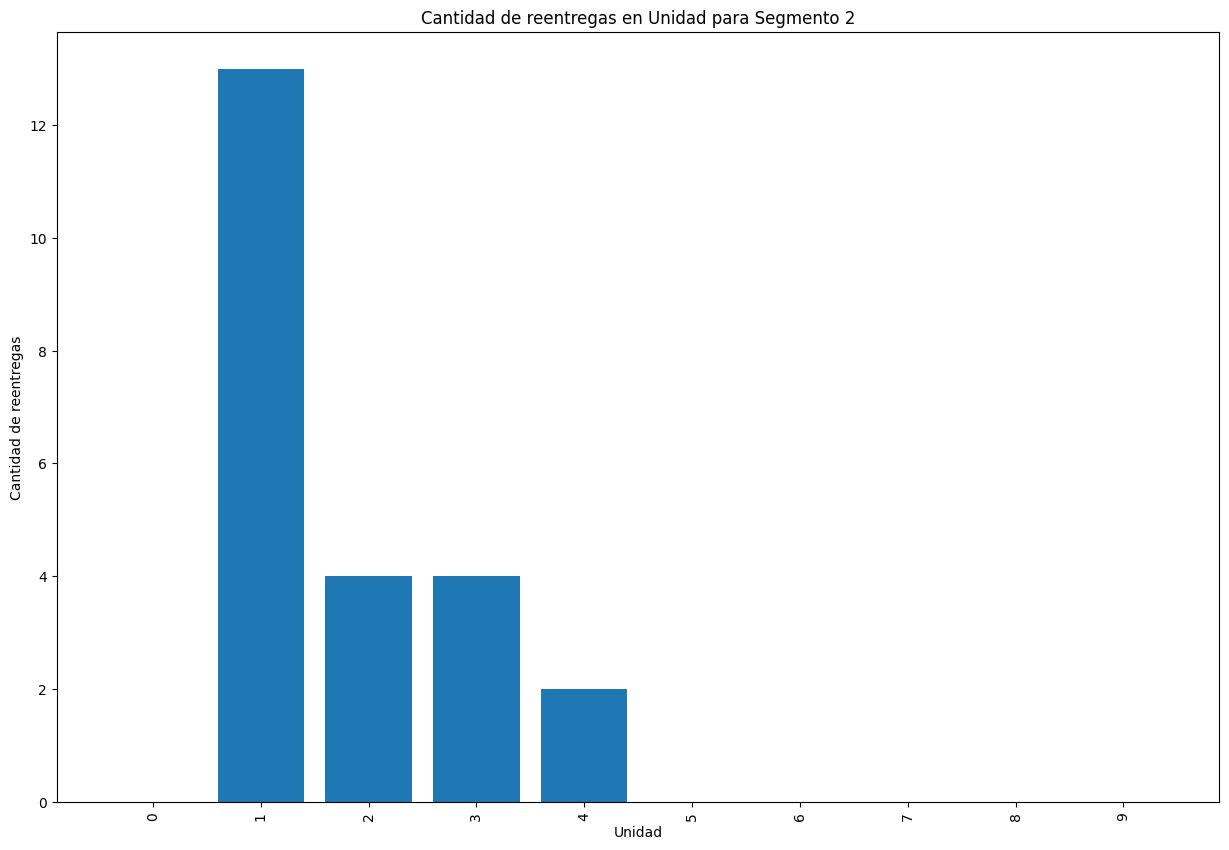

In [53]:
# REFACTORIZAR ESTO. ES EL METODO plot_barras_desde_diccionario CON COLORES
import operator 
x_sorted = sorted(reentregas_por_unidad_que_dejaron_segmento_2.items(), key=operator.itemgetter(0))


items_x = [str(unidad) for unidad, cantidad_de_reentregas in x_sorted]
items_y = [cantidad_de_reentregas for unidad, cantidad_de_reentregas in x_sorted]

fig, ax = plt.subplots(figsize=(15, 10))

ax.bar(items_x, items_y)

ax.set_xlabel('Unidad')
ax.set_ylabel('Cantidad de reentregas')
ax.set_title('Cantidad de reentregas en Unidad para Segmento 2')
plt.xticks(rotation='vertical')
plt.xticks(items_x)

plt.show()


In [54]:
# Segmento 3
reentregas_por_unidad_que_dejaron_segmento_3 = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for alumno, reentregas_por_unidad in cantidad_de_reentregas_por_persona_por_unidad.items():
    if alumno in [alumn.id for alumn in alumnos_que_dejaron_en_la_segunda_parte_de_la_materia]: 
        for unidad in range(0,10):
            reentregas_por_unidad_que_dejaron_segmento_3[unidad] += reentregas_por_unidad.get(unidad, 0)
        
    
reentregas_por_unidad_que_dejaron_segmento_3

{0: 0, 1: 1, 2: 4, 3: 4, 4: 2, 5: 0, 6: 2, 7: 0, 8: 4, 9: 0}

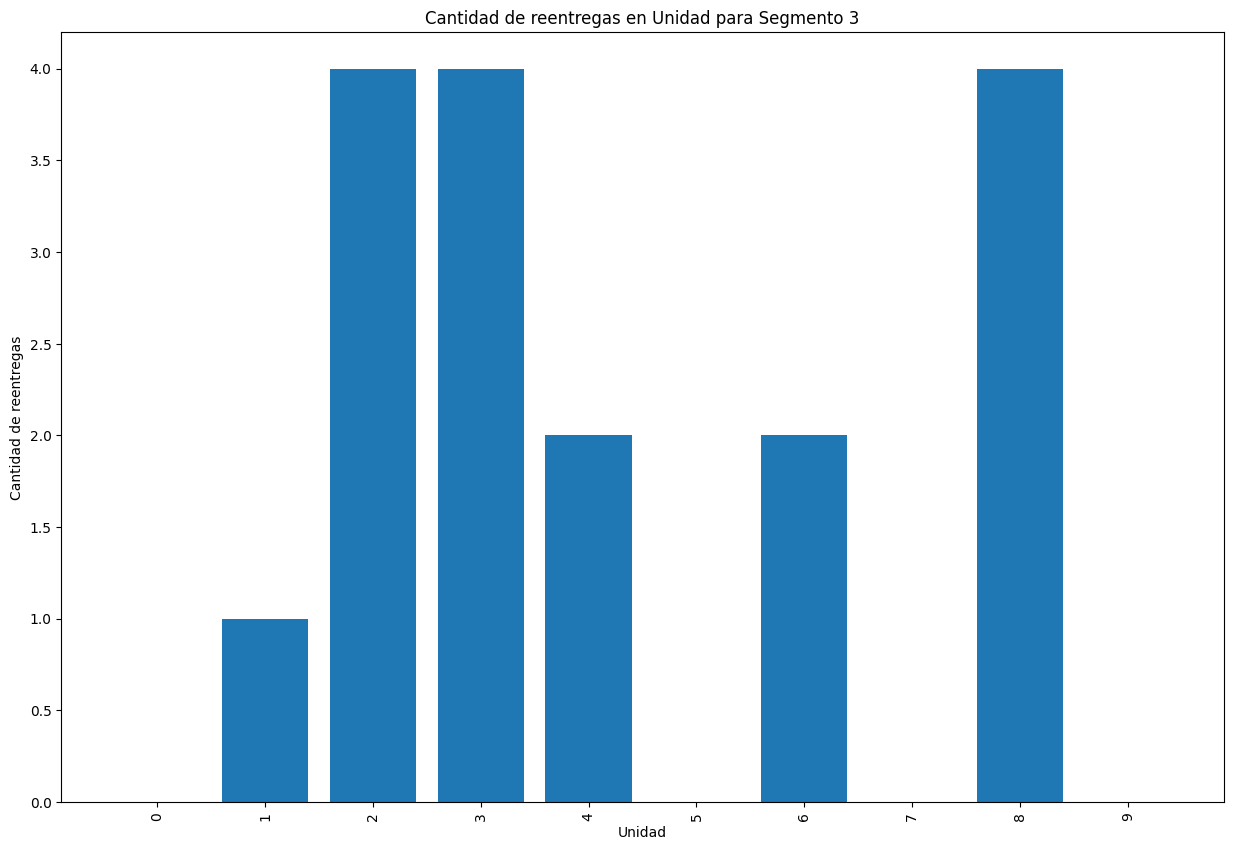

In [55]:
# REFACTORIZAR ESTO. ES EL METODO plot_barras_desde_diccionario CON COLORES
import operator 
x_sorted = sorted(reentregas_por_unidad_que_dejaron_segmento_3.items(), key=operator.itemgetter(0))


items_x = [str(unidad) for unidad, cantidad_de_reentregas in x_sorted]
items_y = [cantidad_de_reentregas for unidad, cantidad_de_reentregas in x_sorted]

fig, ax = plt.subplots(figsize=(15, 10))

ax.bar(items_x, items_y)

ax.set_xlabel('Unidad')
ax.set_ylabel('Cantidad de reentregas')
ax.set_title('Cantidad de reentregas en Unidad para Segmento 3')
plt.xticks(rotation='vertical')
plt.xticks(items_x)

plt.show()

In [56]:
# Segmento 4
reentregas_por_unidad_que_dejaron_segmento_4 = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for alumno, reentregas_por_unidad in cantidad_de_reentregas_por_persona_por_unidad.items():
    if alumno in [alumn.id for alumn in alumnos_que_entregaron_todo]: 
        for unidad in range(0,10):
            reentregas_por_unidad_que_dejaron_segmento_4[unidad] += reentregas_por_unidad.get(unidad, 0)
        
    
reentregas_por_unidad_que_dejaron_segmento_4

{0: 0, 1: 17, 2: 32, 3: 41, 4: 28, 5: 28, 6: 30, 7: 27, 8: 19, 9: 11}

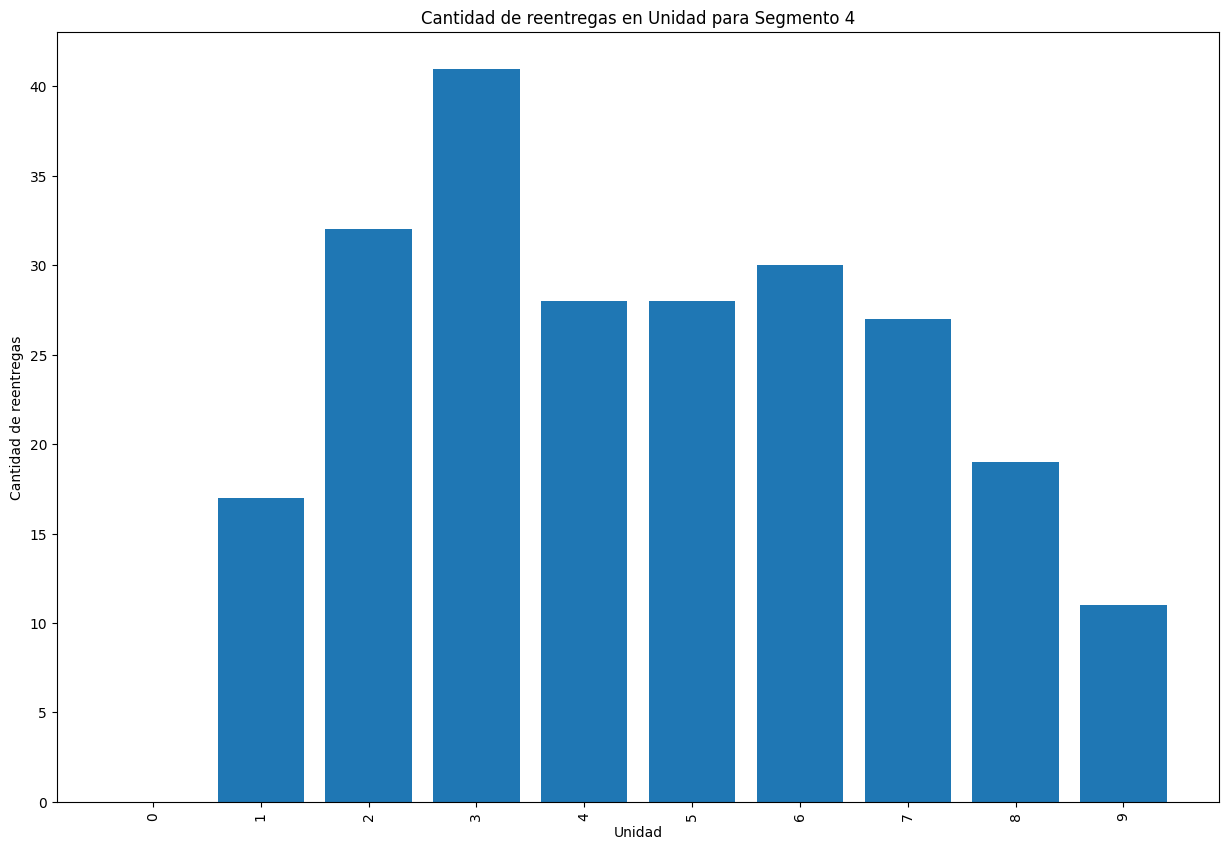

In [57]:
# REFACTORIZAR ESTO. ES EL METODO plot_barras_desde_diccionario CON COLORES
import operator 
x_sorted = sorted(reentregas_por_unidad_que_dejaron_segmento_4.items(), key=operator.itemgetter(0))


items_x = [str(unidad) for unidad, cantidad_de_reentregas in x_sorted]
items_y = [cantidad_de_reentregas for unidad, cantidad_de_reentregas in x_sorted]

fig, ax = plt.subplots(figsize=(15, 10))

ax.bar(items_x, items_y)

ax.set_xlabel('Unidad')
ax.set_ylabel('Cantidad de reentregas')
ax.set_title('Cantidad de reentregas en Unidad para Segmento 4')
plt.xticks(rotation='vertical')
plt.xticks(items_x)

plt.show()

In [ ]:
# Alumno

In [ ]:
## Nivel academico

In [ ]:
### Nivel academico alto implica grupo 4?

In [58]:
df_student_record

,Alumno,Genero,Pais,Estado,Ciudad,EstudiosUniversidad,EstudiosCarrera,EstudiosNivel,EstudiosNivelProgramacion,EstudiosNivelPython,EstudiosLocacion,TrabajoEmpresa,TrabajoRol
0,230,3,Argentina,Santa Fe,Rosario,Instituto de Inmunología Clínica y Experimenta...,,Grado (universitario),3.0,3.0,,,
1,226,3,Argentina,Santa Fe,Rosario,IICAR - CONICET/UNR,,Grado (universitario),2.0,2.0,,,
2,215,3,Argentina,Jujuy,Humahuaca,Unju,,Grado (universitario),1.0,1.0,,,
3,220,3,Argentina,CABA,CABA,UNGS,,Maestría,2.0,1.0,,,
4,241,3,Argentina,Buenos Aires,Mar Del Plata,INTEMA,,Grado (universitario),4.0,2.0,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,380,3,Argentina,,,,Licenciatura en Biotecnología,,NaN,NaN,,,
188,399,3,,,,,,,NaN,NaN,,,
189,384,3,,,,,,,NaN,NaN,,,
190,392,3,,,,,,,NaN,NaN,,,


In [59]:
df_filtrado_alumnos_que_no_comenzaron_la_cursada = df_student_record[df_student_record['Alumno'].isin(segmento_1_ids)]
df_filtrado_alumnos_que_dejaron_en_la_primera_parte_de_la_materia = df_student_record[df_student_record['Alumno'].isin(segmento_2_ids)]
df_filtrado_alumnos_que_dejaron_en_la_segunda_parte_de_la_materia = df_student_record[df_student_record['Alumno'].isin(segmento_3_ids)]
df_filtrado_alumnos_que_entregaron_todo = df_student_record[df_student_record['Alumno'].isin(segmento_4_ids)]

In [ ]:
### Segmento 1

/tmp/ipykernel_636396/104226886.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cantidad_por_nivel, x='EstudiosNivel', y='Cantidad de Alumnos', palette='muted')


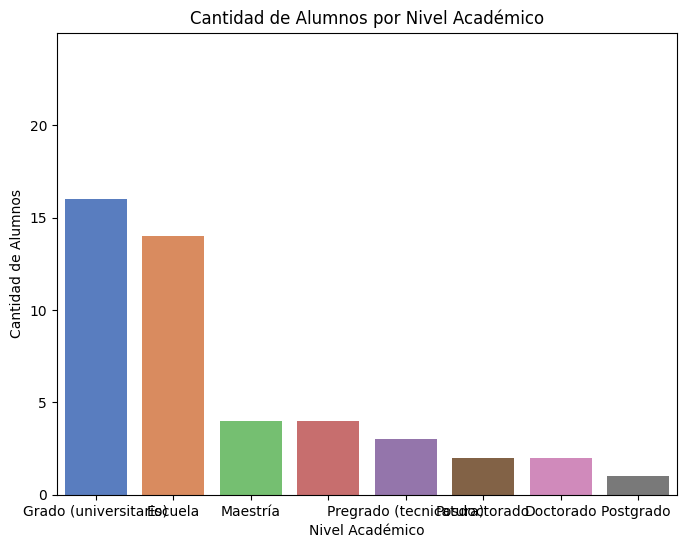

In [60]:
cantidad_por_nivel = df_filtrado_alumnos_que_no_comenzaron_la_cursada['EstudiosNivel'].value_counts().reset_index()
cantidad_por_nivel.columns = ['EstudiosNivel', 'Cantidad de Alumnos']

plt.figure(figsize=(8, 6))
sns.barplot(data=cantidad_por_nivel, x='EstudiosNivel', y='Cantidad de Alumnos', palette='muted')
plt.title('Cantidad de Alumnos por Nivel Académico')
plt.xlabel('Nivel Académico')
plt.ylabel('Cantidad de Alumnos')

# Ajustar la escala y los ticks en el eje y
plt.yticks(range(0, 20 + 1, 5))  # Va de 0 al máximo de la cuenta con intervalos de 5
plt.ylim(0, 25)  # Establece el límite superior para mostrar todos los datos

plt.show()

In [ ]:
### Segmento 2

/tmp/ipykernel_636396/80409471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cantidad_por_nivel, x='EstudiosNivel', y='Cantidad de Alumnos', palette='muted')


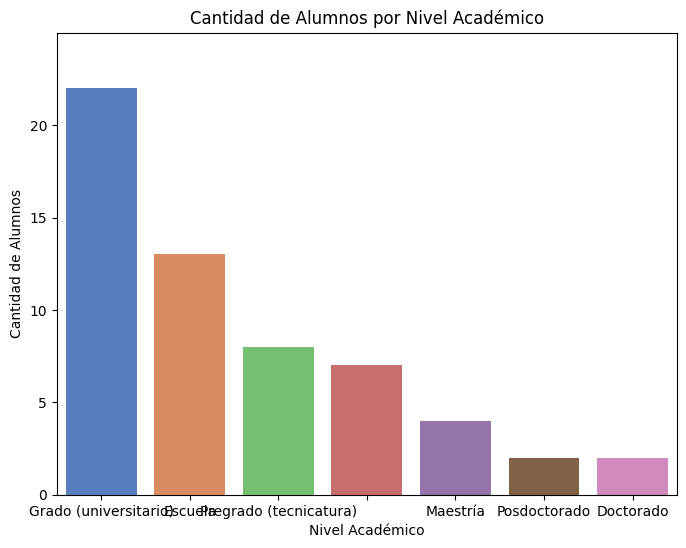

In [61]:
cantidad_por_nivel = df_filtrado_alumnos_que_dejaron_en_la_primera_parte_de_la_materia['EstudiosNivel'].value_counts().reset_index()
cantidad_por_nivel.columns = ['EstudiosNivel', 'Cantidad de Alumnos']

plt.figure(figsize=(8, 6))
sns.barplot(data=cantidad_por_nivel, x='EstudiosNivel', y='Cantidad de Alumnos', palette='muted')
plt.title('Cantidad de Alumnos por Nivel Académico')
plt.xlabel('Nivel Académico')
plt.ylabel('Cantidad de Alumnos')

# Ajustar la escala y los ticks en el eje y
plt.yticks(range(0, 20 + 1, 5))  # Va de 0 al máximo de la cuenta con intervalos de 5
plt.ylim(0, 25)  # Establece el límite superior para mostrar todos los datos


plt.show()

In [ ]:
### Segmento 3

/tmp/ipykernel_636396/1579490479.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cantidad_por_nivel, x='EstudiosNivel', y='Cantidad de Alumnos', palette='muted')


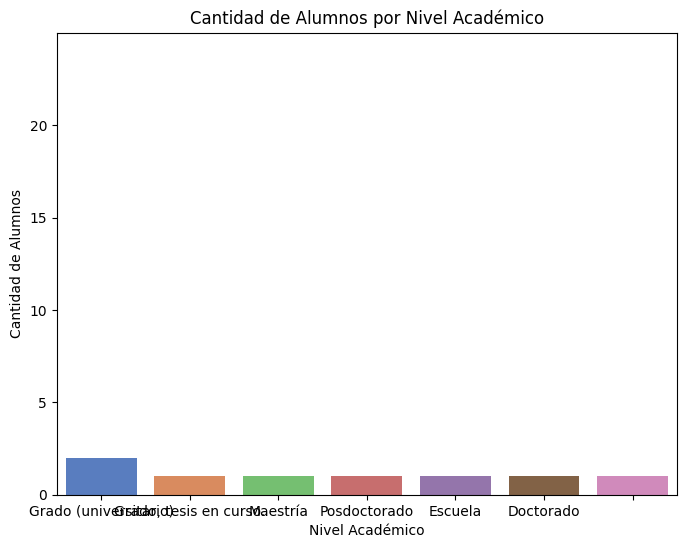

In [62]:
cantidad_por_nivel = df_filtrado_alumnos_que_dejaron_en_la_segunda_parte_de_la_materia['EstudiosNivel'].value_counts().reset_index()
cantidad_por_nivel.columns = ['EstudiosNivel', 'Cantidad de Alumnos']

plt.figure(figsize=(8, 6))
sns.barplot(data=cantidad_por_nivel, x='EstudiosNivel', y='Cantidad de Alumnos', palette='muted')
plt.title('Cantidad de Alumnos por Nivel Académico')
plt.xlabel('Nivel Académico')
plt.ylabel('Cantidad de Alumnos')

# Ajustar la escala y los ticks en el eje y
plt.yticks(range(0, 20 + 1, 5))  # Va de 0 al máximo de la cuenta con intervalos de 5
plt.ylim(0, 25)  # Establece el límite superior para mostrar todos los datos

plt.show()

In [ ]:
### Segmento 4

/tmp/ipykernel_636396/1182281833.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cantidad_por_nivel, x='EstudiosNivel', y='Cantidad de Alumnos', palette='muted')


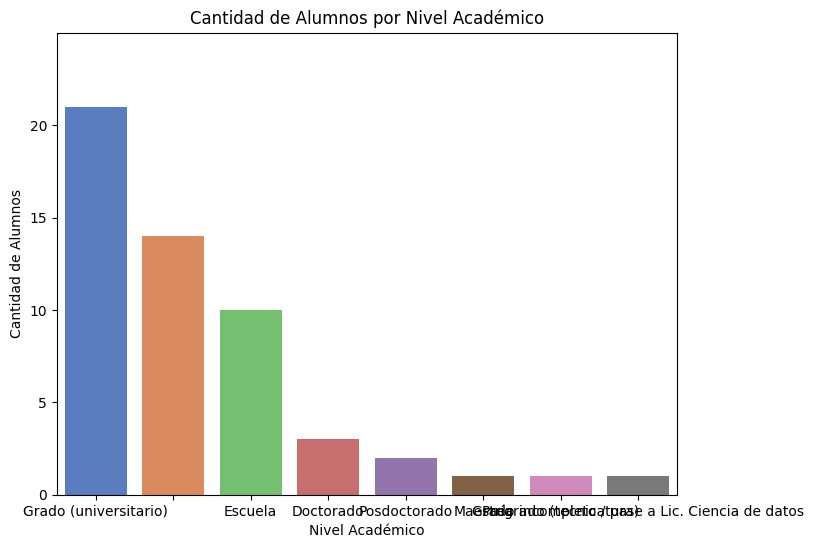

In [63]:
cantidad_por_nivel = df_filtrado_alumnos_que_entregaron_todo['EstudiosNivel'].value_counts().reset_index()
cantidad_por_nivel.columns = ['EstudiosNivel', 'Cantidad de Alumnos']

plt.figure(figsize=(8, 6))
sns.barplot(data=cantidad_por_nivel, x='EstudiosNivel', y='Cantidad de Alumnos', palette='muted')
plt.title('Cantidad de Alumnos por Nivel Académico')
plt.xlabel('Nivel Académico')
plt.ylabel('Cantidad de Alumnos')

# Ajustar la escala y los ticks en el eje y
plt.yticks(range(0, 20 + 1, 5))  # Va de 0 al máximo de la cuenta con intervalos de 5
plt.ylim(0, 25)  # Establece el límite superior para mostrar todos los datos

plt.show()

In [ ]:
### Los segmentos juntos

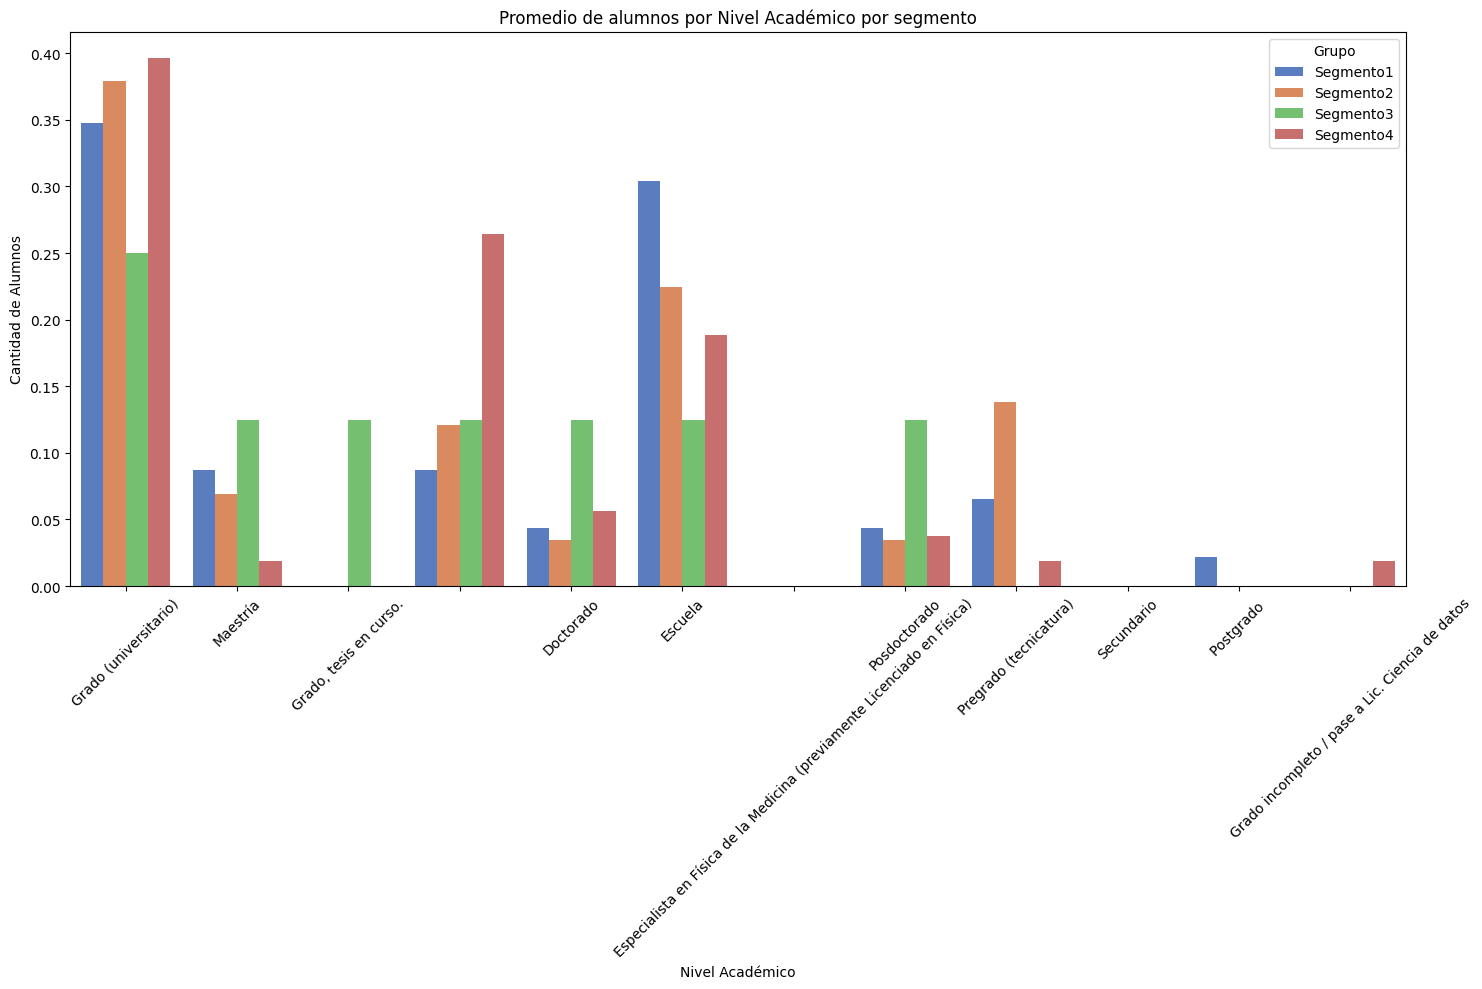

In [64]:
# Obtener todos los niveles existentes en el DataFrame original
estudios_nivel_existentes = df_student_record['EstudiosNivel'].unique()

# Obtener la cantidad de alumnos por nivel académico para cada grupo
cantidad_grupo1 = df_filtrado_alumnos_que_no_comenzaron_la_cursada['EstudiosNivel'].value_counts().reset_index()
cantidad_grupo1.columns = ['EstudiosNivel', 'Cantidad segmento 1']

cantidad_grupo2 = df_filtrado_alumnos_que_dejaron_en_la_primera_parte_de_la_materia['EstudiosNivel'].value_counts().reset_index()
cantidad_grupo2.columns = ['EstudiosNivel', 'Cantidad segmento 2']

cantidad_grupo3 = df_filtrado_alumnos_que_dejaron_en_la_segunda_parte_de_la_materia['EstudiosNivel'].value_counts().reset_index()
cantidad_grupo3.columns = ['EstudiosNivel', 'Cantidad segmento 3']

cantidad_grupo4 = df_filtrado_alumnos_que_entregaron_todo['EstudiosNivel'].value_counts().reset_index()
cantidad_grupo4.columns = ['EstudiosNivel', 'Cantidad segmento 4']

cantidad_grupo1['Cantidad segmento 1'].tolist()

# Crear un DataFrame con todos los niveles existentes y fusionarlo con el de la categoría actual
df_niveles_completos = pd.DataFrame({'EstudiosNivel': estudios_nivel_existentes})

cantidad_grupo1 = pd.merge(df_niveles_completos, cantidad_grupo1, on='EstudiosNivel', how='left')
cantidad_grupo1 = cantidad_grupo1.fillna(0)  # Reemplazar NaN con 0
cantidad_grupo1.sort_values('EstudiosNivel')

cantidad_grupo2 = pd.merge(df_niveles_completos, cantidad_grupo2, on='EstudiosNivel', how='left')
cantidad_grupo2 = cantidad_grupo2.fillna(0)  # Reemplazar NaN con 0
cantidad_grupo2.sort_values('EstudiosNivel')

cantidad_grupo3 = pd.merge(df_niveles_completos, cantidad_grupo3, on='EstudiosNivel', how='left')
cantidad_grupo3 = cantidad_grupo3.fillna(0)  # Reemplazar NaN con 0
cantidad_grupo3.sort_values('EstudiosNivel')

cantidad_grupo4 = pd.merge(df_niveles_completos, cantidad_grupo4, on='EstudiosNivel', how='left')
cantidad_grupo4 = cantidad_grupo4.fillna(0)  # Reemplazar NaN con 0
cantidad_grupo4.sort_values('EstudiosNivel')

df_estudios_por_segmento = pd.DataFrame({
    'EstudiosNivel': cantidad_grupo1['EstudiosNivel'].tolist(),
    'Segmento1': [x/len(alumnos_que_no_comenzaron_la_cursada) for x in cantidad_grupo1['Cantidad segmento 1'].tolist()],
    'Segmento2': [x/len(alumnos_que_dejaron_en_la_primera_parte_de_la_materia) for x in cantidad_grupo2['Cantidad segmento 2'].tolist()],
    'Segmento3': [x/len(alumnos_que_dejaron_en_la_segunda_parte_de_la_materia) for x in cantidad_grupo3['Cantidad segmento 3'].tolist()],
    'Segmento4': [x/len(alumnos_que_entregaron_todo) for x in cantidad_grupo4['Cantidad segmento 4'].tolist()],
})

# Reorganizar los datos para Seaborn utilizando melt
merged_data_melted = pd.melt(df_estudios_por_segmento, id_vars=['EstudiosNivel'], var_name='Grupo', value_name='Cantidad de Alumnos')

# Crear el gráfico de barras agrupadas con Seaborn
plt.subplots(figsize=(15, 10))
sns.barplot(data=merged_data_melted, x='EstudiosNivel', y='Cantidad de Alumnos', hue='Grupo', palette='muted')

plt.title('Promedio de alumnos por Nivel Académico por segmento')
plt.xlabel('Nivel Académico')
plt.ylabel('Cantidad de Alumnos')
plt.legend(title='Grupo')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
De todos los niveles academicos, los que vemos que podrian llegar a darnos algo de informacion son Escuela y grado universitario.

Para el primero, la probabilidad de no terminar es alta, incluso de ni siquiera comenzar la cursada. Mas chances de no arrancar que de terminar.
Para el segundo, no sabemos que puede pasar. Es parejo para los 4 segmentos.

In [ ]:
# Nivel python

In [ ]:
## Densidad poblacional 

x nivel academico para todos los segmentos juntos

In [ ]:
### Segmento 1

/tmp/ipykernel_636396/2182177108.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_filtrado_alumnos_que_no_comenzaron_la_cursada, x='EstudiosNivelPython', hue='EstudiosNivel', fill=True, alpha=0.5, palette='muted')


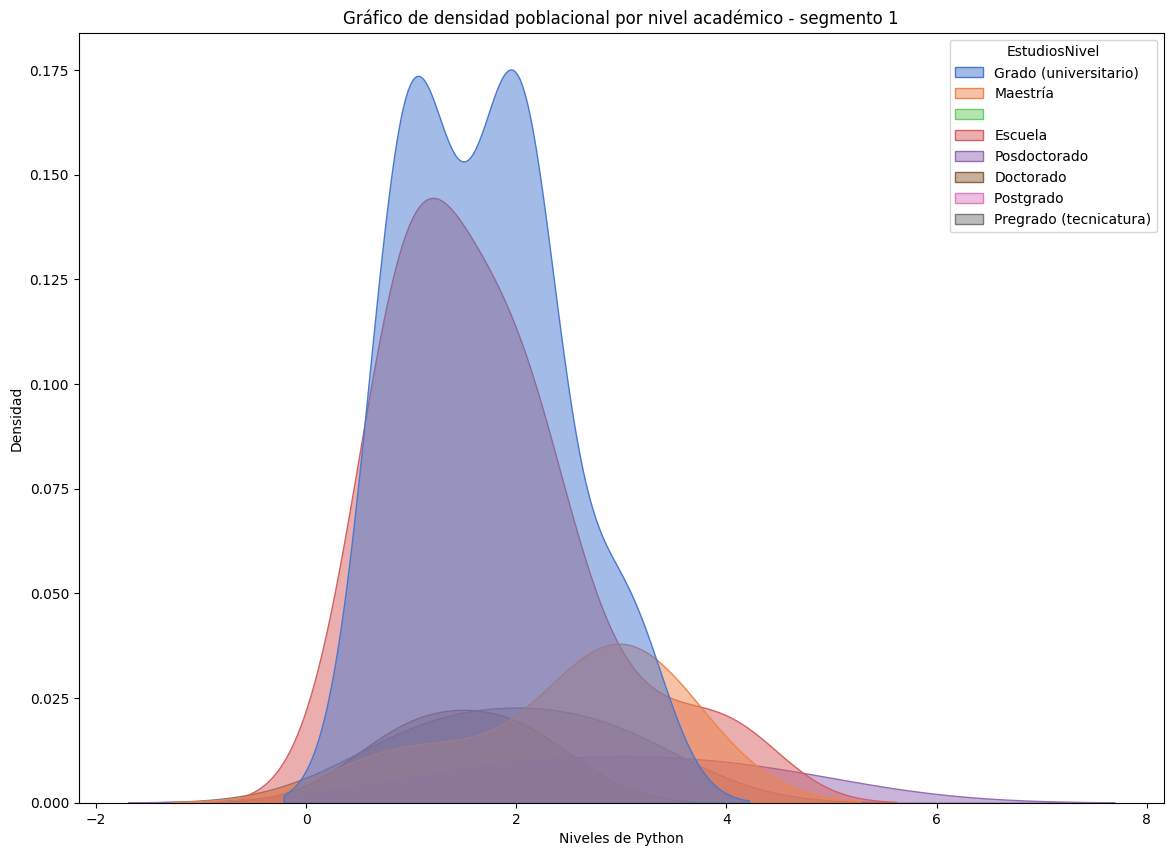

In [65]:
plt.figure(figsize=(14, 10))
sns.kdeplot(data=df_filtrado_alumnos_que_no_comenzaron_la_cursada, x='EstudiosNivelPython', hue='EstudiosNivel', fill=True, alpha=0.5, palette='muted')
plt.title('Gráfico de densidad poblacional por nivel académico - segmento 1')
plt.xlabel('Niveles de Python')
plt.ylabel('Densidad')

plt.show()

In [ ]:
### Segmento 2

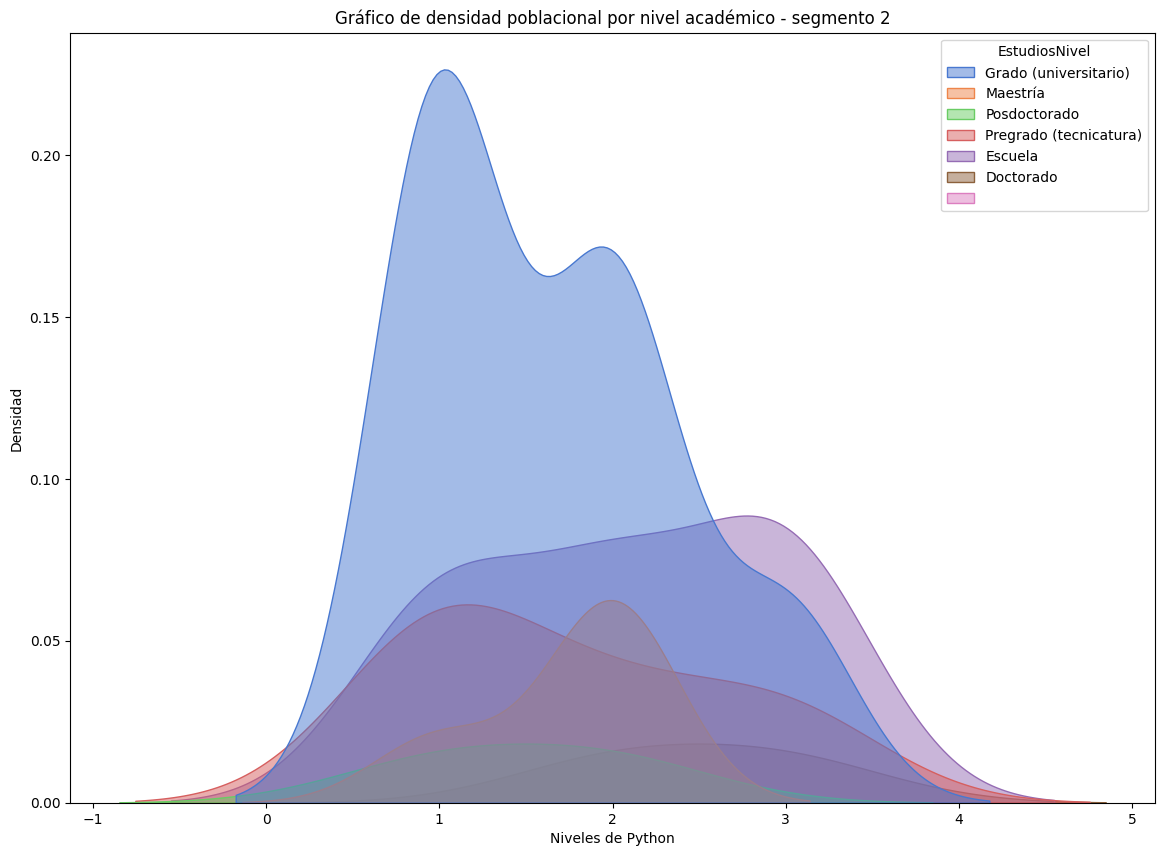

In [66]:
plt.figure(figsize=(14, 10))
sns.kdeplot(data=df_filtrado_alumnos_que_dejaron_en_la_primera_parte_de_la_materia, x='EstudiosNivelPython', hue='EstudiosNivel', fill=True, alpha=0.5, palette='muted')
plt.title('Gráfico de densidad poblacional por nivel académico - segmento 2')
plt.xlabel('Niveles de Python')
plt.ylabel('Densidad')

plt.show()

In [ ]:
### Segmento 3

/tmp/ipykernel_636396/4005654539.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_filtrado_alumnos_que_dejaron_en_la_segunda_parte_de_la_materia, x='EstudiosNivelPython', hue='EstudiosNivel', fill=True, alpha=0.5, palette='muted')
/tmp/ipykernel_636396/4005654539.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_filtrado_alumnos_que_dejaron_en_la_segunda_parte_de_la_materia, x='EstudiosNivelPython', hue='EstudiosNivel', fill=True, alpha=0.5, palette='muted')


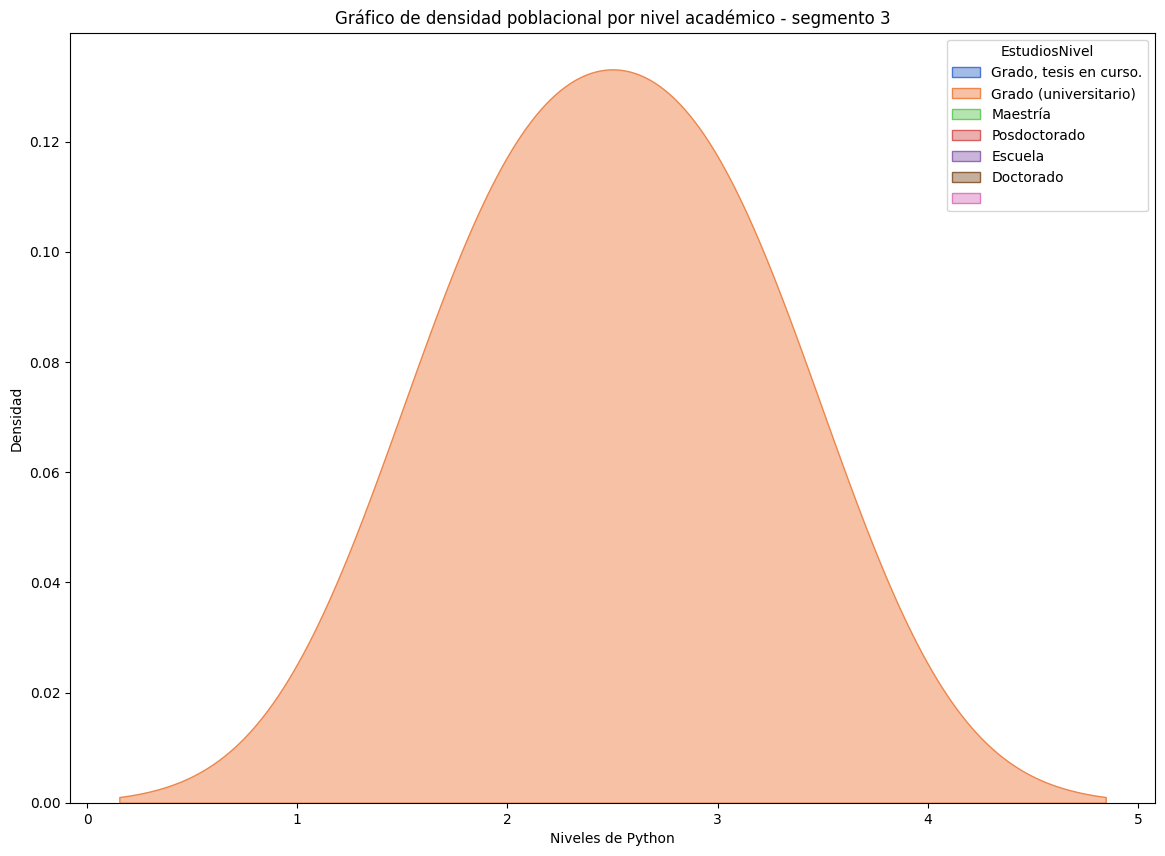

In [67]:
plt.figure(figsize=(14, 10))
sns.kdeplot(data=df_filtrado_alumnos_que_dejaron_en_la_segunda_parte_de_la_materia, x='EstudiosNivelPython', hue='EstudiosNivel', fill=True, alpha=0.5, palette='muted')
plt.title('Gráfico de densidad poblacional por nivel académico - segmento 3')
plt.xlabel('Niveles de Python')
plt.ylabel('Densidad')

plt.show()

In [ ]:
### Segmento 4

/tmp/ipykernel_636396/2904035664.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_filtrado_alumnos_que_entregaron_todo, x='EstudiosNivelPython', hue='EstudiosNivel', fill=True, alpha=0.5, palette='muted')
/tmp/ipykernel_636396/2904035664.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_filtrado_alumnos_que_entregaron_todo, x='EstudiosNivelPython', hue='EstudiosNivel', fill=True, alpha=0.5, palette='muted')
/tmp/ipykernel_636396/2904035664.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_filtrado_alumnos_que_entregaron_todo, x='EstudiosNivelPython', hue='EstudiosNivel', fill=True, alpha=0.5, palette='muted')


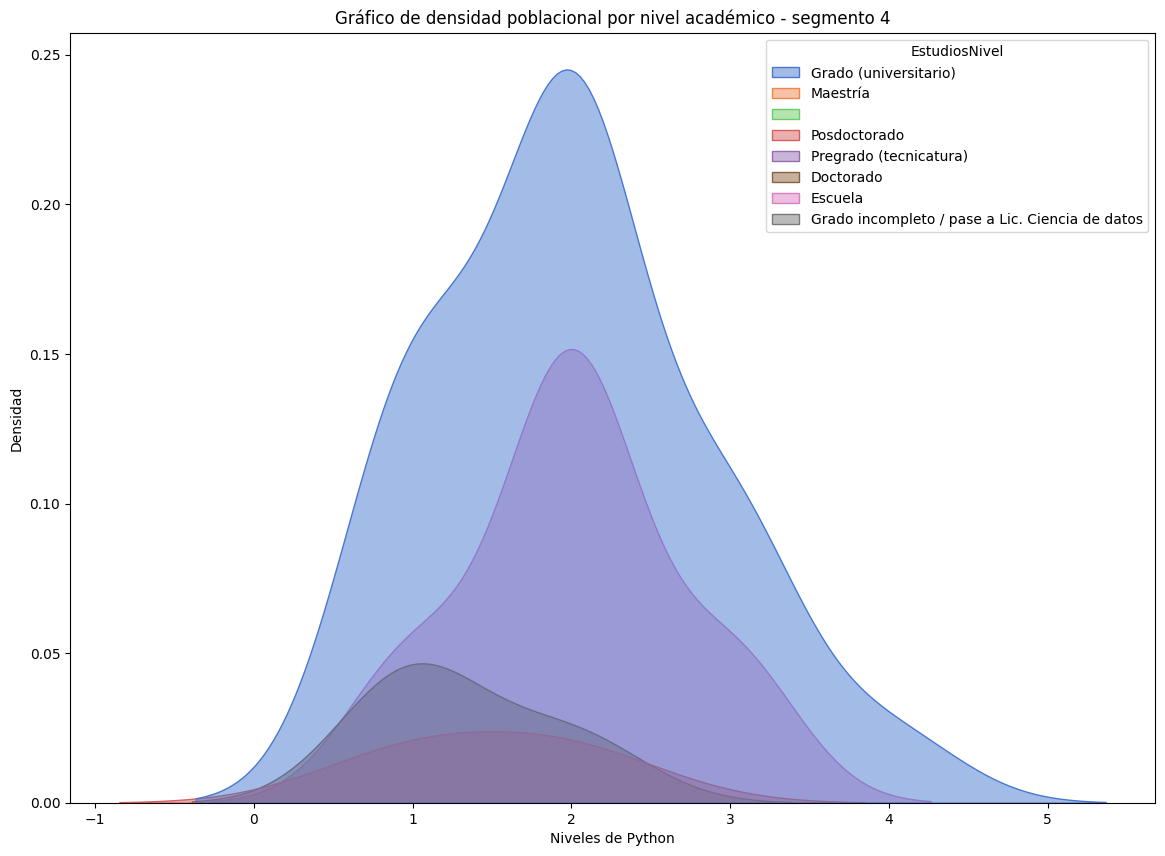

In [68]:
plt.figure(figsize=(14, 10))
sns.kdeplot(data=df_filtrado_alumnos_que_entregaron_todo, x='EstudiosNivelPython', hue='EstudiosNivel', fill=True, alpha=0.5, palette='muted')
plt.title('Gráfico de densidad poblacional por nivel académico - segmento 4')
plt.xlabel('Niveles de Python')
plt.ylabel('Densidad')

plt.show()

In [ ]:
### Los segmentos juntos

/tmp/ipykernel_636396/2192919246.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_student_record, x='EstudiosNivelPython', hue='EstudiosNivel', fill=True, alpha=0.5, palette='muted')
/tmp/ipykernel_636396/2192919246.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_student_record, x='EstudiosNivelPython', hue='EstudiosNivel', fill=True, alpha=0.5, palette='muted')
/tmp/ipykernel_636396/2192919246.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_student_record, x='EstudiosNivelPython', hue='EstudiosNivel', fill=True, alpha=0.5, palette='muted')


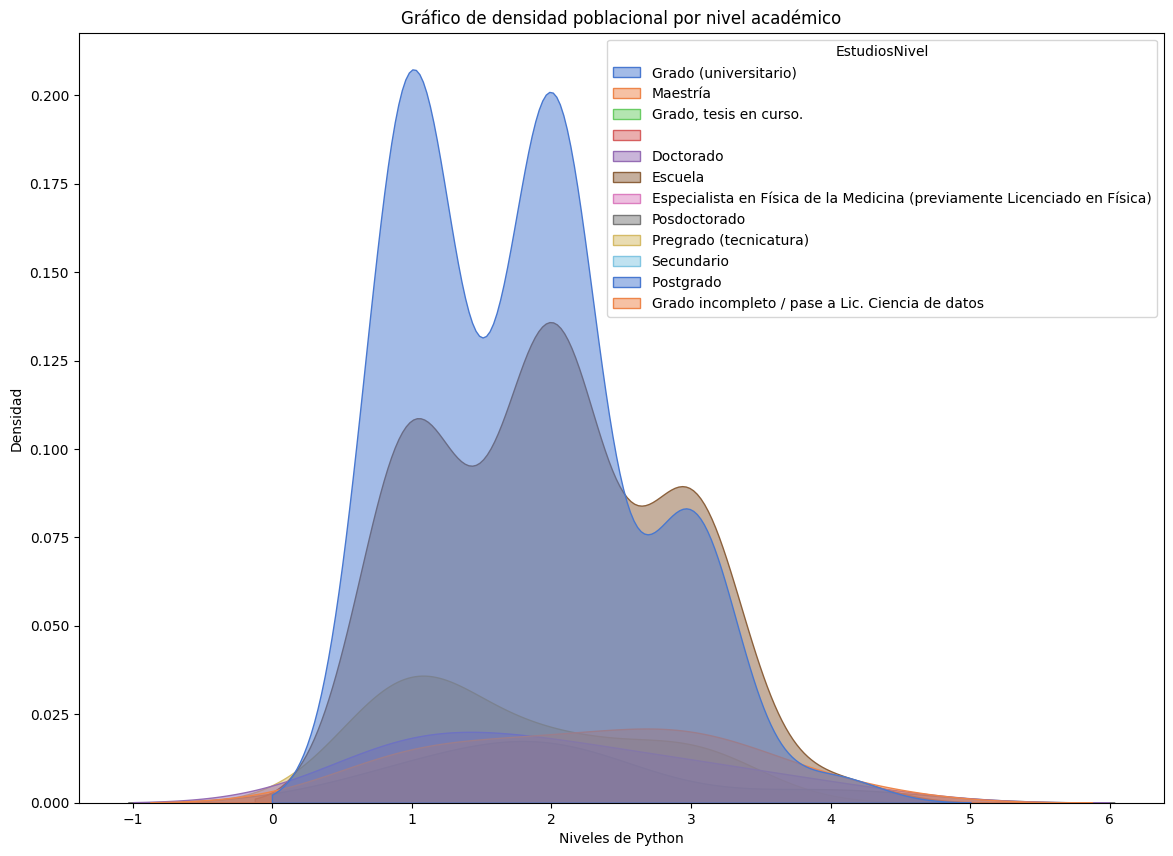

In [69]:
plt.figure(figsize=(14, 10))
sns.kdeplot(data=df_student_record, x='EstudiosNivelPython', hue='EstudiosNivel', fill=True, alpha=0.5, palette='muted')
plt.title('Gráfico de densidad poblacional por nivel académico')
plt.xlabel('Niveles de Python')
plt.ylabel('Densidad')

plt.show()

In [ ]:
Vamos a enfocarnos en los que tienen nivel alto de Python (entendiendose como >4) para ver si eso implica que les vaya mejor en la cursada.

In [70]:
df_filtrado_alumnos_que_no_comenzaron_la_cursada_nivel_alto_python = df_filtrado_alumnos_que_no_comenzaron_la_cursada[df_filtrado_alumnos_que_no_comenzaron_la_cursada['EstudiosNivelPython'].isin([3.0, 4.0, 5.0])]
df_filtrado_alumnos_que_dejaron_en_la_primera_parte_de_la_materia_nivel_alto_python = df_filtrado_alumnos_que_dejaron_en_la_primera_parte_de_la_materia[df_filtrado_alumnos_que_dejaron_en_la_primera_parte_de_la_materia['EstudiosNivelPython'].isin([3.0, 4.0, 5.0])]
df_filtrado_alumnos_que_dejaron_en_la_segunda_parte_de_la_materia_nivel_alto_python = df_filtrado_alumnos_que_dejaron_en_la_segunda_parte_de_la_materia[df_filtrado_alumnos_que_dejaron_en_la_segunda_parte_de_la_materia['EstudiosNivelPython'].isin([3.0, 4.0, 5.0])]
df_filtrado_alumnos_que_entregaron_todo_nivel_alto_python = df_filtrado_alumnos_que_entregaron_todo[df_filtrado_alumnos_que_entregaron_todo['EstudiosNivelPython'].isin([3.0, 4.0, 5.0])]

In [71]:
df_filtrado_alumnos_que_no_comenzaron_la_cursada_nivel_alto_python

,Alumno,Genero,Pais,Estado,Ciudad,EstudiosUniversidad,EstudiosCarrera,EstudiosNivel,EstudiosNivelProgramacion,EstudiosNivelPython,EstudiosLocacion,TrabajoEmpresa,TrabajoRol
16,250,3,Argentina,Buenos Aires,San Martin,UBA,,Maestría,3.0,3.0,,,
24,213,3,Argentina,Córdoba,Córdoba,Ceprocor. Ministerio de Ciencia y Técnica,,Maestría,3.0,3.0,,,
49,265,3,Argentina,Salta,Salta,UNSA,,Maestría,3.0,3.0,,,
82,312,3,Argentina,Buenos aires,Munro,Ciencias de datos,Ciencias de datos,Escuela,3.0,3.0,,,
88,298,3,Argentina,Bs.As,Villa Ballester,"FIUBA,UTN y UNSAM",,Postgrado,4.0,3.0,,,
92,335,3,Argentina,Buenos Aires,Olivos,"Estudio en la UNSAM, trabajo en Novakorp.",,Pregrado (tecnicatura),3.0,3.0,,Rol: Data Analyst Trainee - Empresa: Novakorp,
111,327,3,Argentina,CABA,CABA (Ciudad autonoma de Bs As),Estudio en la UNSAM y estoy trabajando como an...,,Escuela,4.0,4.0,,,
115,304,3,Argentina,Chascomus,Chascomus,UNSAM,,Grado (universitario),3.0,3.0,,,
116,299,3,Argentina,Cordoba,cordoba,Instituto de Investigaciones en Fisicoquímica ...,,Posdoctorado,3.0,4.0,,,
119,321,3,Argentina,Bs as,Caba,Ministerio de educacion,ingenieria informatica,Grado (universitario),5.0,3.0,,,


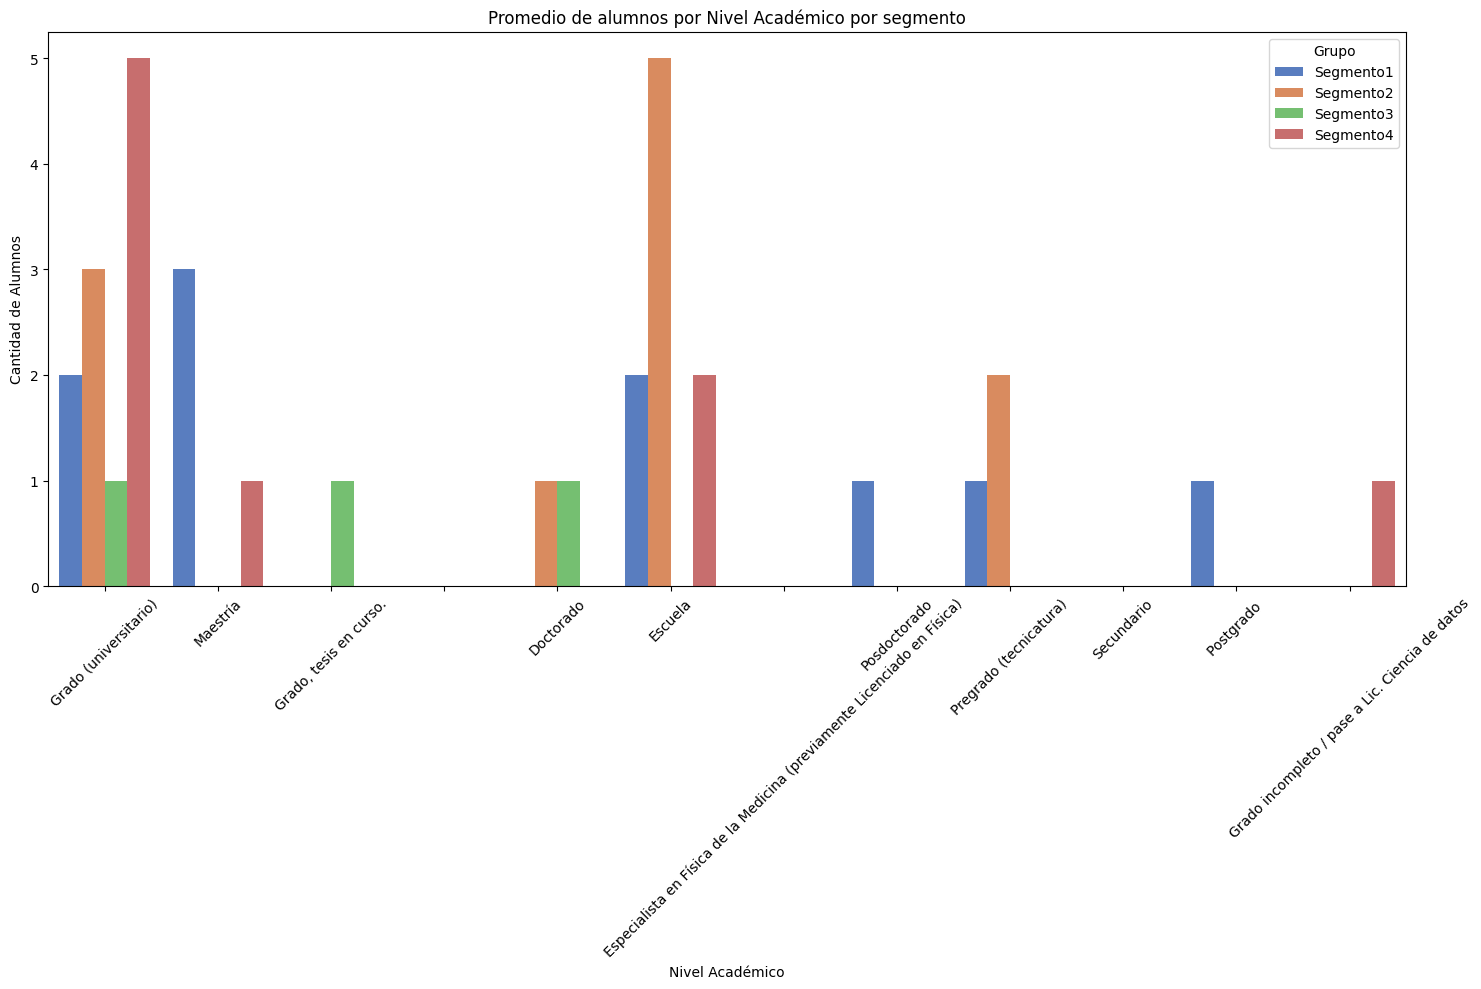

In [72]:
# Obtener todos los niveles existentes en el DataFrame original
estudios_nivel_existentes = df_student_record['EstudiosNivel'].unique()

# Obtener la cantidad de alumnos por nivel académico para cada grupo
cantidad_grupo1 = df_filtrado_alumnos_que_no_comenzaron_la_cursada_nivel_alto_python['EstudiosNivel'].value_counts().reset_index()
cantidad_grupo1.columns = ['EstudiosNivel', 'Cantidad segmento 1']

cantidad_grupo2 = df_filtrado_alumnos_que_dejaron_en_la_primera_parte_de_la_materia_nivel_alto_python['EstudiosNivel'].value_counts().reset_index()
cantidad_grupo2.columns = ['EstudiosNivel', 'Cantidad segmento 2']

cantidad_grupo3 = df_filtrado_alumnos_que_dejaron_en_la_segunda_parte_de_la_materia_nivel_alto_python['EstudiosNivel'].value_counts().reset_index()
cantidad_grupo3.columns = ['EstudiosNivel', 'Cantidad segmento 3']

cantidad_grupo4 = df_filtrado_alumnos_que_entregaron_todo_nivel_alto_python['EstudiosNivel'].value_counts().reset_index()
cantidad_grupo4.columns = ['EstudiosNivel', 'Cantidad segmento 4']

cantidad_grupo1['Cantidad segmento 1'].tolist()

# Crear un DataFrame con todos los niveles existentes y fusionarlo con el de la categoría actual
df_niveles_completos = pd.DataFrame({'EstudiosNivel': estudios_nivel_existentes})

cantidad_grupo1 = pd.merge(df_niveles_completos, cantidad_grupo1, on='EstudiosNivel', how='left')
cantidad_grupo1 = cantidad_grupo1.fillna(0)  # Reemplazar NaN con 0
cantidad_grupo1.sort_values('EstudiosNivel')

cantidad_grupo2 = pd.merge(df_niveles_completos, cantidad_grupo2, on='EstudiosNivel', how='left')
cantidad_grupo2 = cantidad_grupo2.fillna(0)  # Reemplazar NaN con 0
cantidad_grupo2.sort_values('EstudiosNivel')

cantidad_grupo3 = pd.merge(df_niveles_completos, cantidad_grupo3, on='EstudiosNivel', how='left')
cantidad_grupo3 = cantidad_grupo3.fillna(0)  # Reemplazar NaN con 0
cantidad_grupo3.sort_values('EstudiosNivel')

cantidad_grupo4 = pd.merge(df_niveles_completos, cantidad_grupo4, on='EstudiosNivel', how='left')
cantidad_grupo4 = cantidad_grupo4.fillna(0)  # Reemplazar NaN con 0
cantidad_grupo4.sort_values('EstudiosNivel')

df_estudios_por_segmento = pd.DataFrame({
    'EstudiosNivel': cantidad_grupo1['EstudiosNivel'].tolist(),
    'Segmento1': [x for x in cantidad_grupo1['Cantidad segmento 1'].tolist()],
    'Segmento2': [x for x in cantidad_grupo2['Cantidad segmento 2'].tolist()],
    'Segmento3': [x for x in cantidad_grupo3['Cantidad segmento 3'].tolist()],
    'Segmento4': [x for x in cantidad_grupo4['Cantidad segmento 4'].tolist()],
#     'Segmento1': [x/len(alumnos_que_no_comenzaron_la_cursada) for x in cantidad_grupo1['Cantidad segmento 1'].tolist()],
#     'Segmento2': [x/len(alumnos_que_dejaron_en_la_primera_parte_de_la_materia) for x in cantidad_grupo2['Cantidad segmento 2'].tolist()],
#     'Segmento3': [x/len(alumnos_que_dejaron_en_la_segunda_parte_de_la_materia) for x in cantidad_grupo3['Cantidad segmento 3'].tolist()],
#     'Segmento4': [x/len(alumnos_que_entregaron_todo) for x in cantidad_grupo4['Cantidad segmento 4'].tolist()],
})

# Reorganizar los datos para Seaborn utilizando melt
merged_data_melted = pd.melt(df_estudios_por_segmento, id_vars=['EstudiosNivel'], var_name='Grupo', value_name='Cantidad de Alumnos')

# Crear el gráfico de barras agrupadas con Seaborn
plt.subplots(figsize=(15, 10))
sns.barplot(data=merged_data_melted, x='EstudiosNivel', y='Cantidad de Alumnos', hue='Grupo', palette='muted')

plt.title('Promedio de alumnos por Nivel Académico por segmento')
plt.xlabel('Nivel Académico')
plt.ylabel('Cantidad de Alumnos')
plt.legend(title='Grupo')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [73]:
alumnos_que_no_comenzaron_la_cursada
alumnos_que_dejaron_en_la_primera_parte_de_la_materia
alumnos_que_dejaron_en_la_segunda_parte_de_la_materia
alumnos_que_entregaron_todo

[<StudentRecord: flormalizia@gmail.com>,
 <StudentRecord: paocacchiarelli@gmail.com>,
 <StudentRecord: fedemorales93@gmail.com>,
 <StudentRecord: ortizrocca@agro.uba.ar>,
 <StudentRecord: matiasmolina85@hotmail.com>,
 <StudentRecord: rdledesma1995@gmail.com>,
 <StudentRecord: gimenezlaura60@gmail.com>,
 <StudentRecord: josejfernandez.24@gmail.com>,
 <StudentRecord: mercedesfraire@gmail.com>,
 <StudentRecord: clarapalu17@gmail.com>,
 <StudentRecord: eraszto@gmail.com>,
 <StudentRecord: leilaguzman95@gmail.com>,
 <StudentRecord: fermag.and@gmail.com>,
 <StudentRecord: fa_caviglia@hotmail.com>,
 <StudentRecord: loreta.magallanes@unc.edu.ar>,
 <StudentRecord: lnieto@unsam.edu.ar>,
 <StudentRecord: arielito_cap@hotmail.com>,
 <StudentRecord: hanisch.priscila@gmail.com>,
 <StudentRecord: juanorlowski@gmail.com>,
 <StudentRecord: clazzarino@gmail.com>,
 <StudentRecord: pau.steinberg@gmail.com>,
 <StudentRecord: jesica.formoso@gmail.com>,
 <StudentRecord: tomaszucchini050@gmail.com>,
 <Student

In [ ]:
tiene sentido descartar las categorias y solo quedarnos con escuela y grado?

In [ ]:
## Trabajan?

In [74]:
# Juntar empleados y desempleados por segmento
cantidad_segmento_1_empleados = ((df_filtrado_alumnos_que_no_comenzaron_la_cursada['TrabajoEmpresa'] != '') | (df_filtrado_alumnos_que_no_comenzaron_la_cursada['TrabajoRol'] != '')).sum()
cantidad_segmento_1_desempleados = df_filtrado_alumnos_que_no_comenzaron_la_cursada.shape[0] - cantidad_segmento_1_empleados
cantidad_segmento_2_empleados = ((df_filtrado_alumnos_que_dejaron_en_la_primera_parte_de_la_materia['TrabajoEmpresa'] != '') | (df_filtrado_alumnos_que_dejaron_en_la_primera_parte_de_la_materia['TrabajoRol'] != '')).sum()
cantidad_segmento_2_desempleados = df_filtrado_alumnos_que_dejaron_en_la_primera_parte_de_la_materia.shape[0] - cantidad_segmento_2_empleados
cantidad_segmento_3_empleados = ((df_filtrado_alumnos_que_dejaron_en_la_segunda_parte_de_la_materia['TrabajoEmpresa'] != '') | (df_filtrado_alumnos_que_dejaron_en_la_segunda_parte_de_la_materia['TrabajoRol'] != '')).sum()
cantidad_segmento_3_desempleados = df_filtrado_alumnos_que_dejaron_en_la_segunda_parte_de_la_materia.shape[0] - cantidad_segmento_3_empleados
cantidad_segmento_4_empleados = ((df_filtrado_alumnos_que_entregaron_todo['TrabajoEmpresa'] != '') | (df_filtrado_alumnos_que_entregaron_todo['TrabajoRol'] != '')).sum()
cantidad_segmento_4_desempleados = df_filtrado_alumnos_que_entregaron_todo.shape[0] - cantidad_segmento_4_empleados

# Crear un DataFrame con todos los niveles existentes y fusionarlo con el de la categoría actual
df_trabajo_por_segmento = pd.DataFrame({
    'EstadoLaboral': ['Empleados', 'Desempleados'],
    'Segmento1': [cantidad_segmento_1_empleados, cantidad_segmento_1_desempleados],
    'Segmento2': [cantidad_segmento_2_empleados, cantidad_segmento_2_desempleados],
    'Segmento3': [cantidad_segmento_3_empleados, cantidad_segmento_3_desempleados],
    'Segmento4': [cantidad_segmento_4_empleados, cantidad_segmento_4_desempleados],
})


df_trabajo_por_segmento

,EstadoLaboral,Segmento1,Segmento2,Segmento3,Segmento4
0,Empleados,4,3,0,5
1,Desempleados,42,55,8,48


In [ ]:
Tienen sentido los datos? Hay pocos empleados y no podemos inferir nada con esto, habran compleado cualquier cosa?